In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = '../data'
IMG_SIZE = (64, 64)
BATCH_SIZE = 32


train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=DATA_DIR,
    labels='inferred',
    label_mode='int',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    seed=42,
    validation_split=0.2,
    subset='training'
    )

val_ds = tf.keras.utils.image_dataset_from_directory(
    directory=DATA_DIR,
    labels='inferred',
    label_mode='int',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    seed=42,
    validation_split=0.2,
    subset='validation'
    )

classes = train_ds.class_names

print(f'Classes: {classes}')
print(f'Number of classes: {len(classes)}')
print(f'Number of training batches: {len(train_ds)}')
print(f'Number of validation batches: {len(val_ds)}')

Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.
Classes: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']
Number of classes: 10
Number of training batches: 655
Number of validation batches: 164


In [3]:
base_model_mobilenet = tf.keras.applications.MobileNetV2(
    input_shape=(64, 64, 3),
    include_top=False, 
    weights='imagenet'
)
base_model_mobilenet.trainable = False

/var/folders/3n/tf2ymb613ssdqzz2ccqn82dc0000gn/T/ipykernel_64825/3205406809.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_mobilenet = tf.keras.applications.MobileNetV2(


In [4]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 3)),
    
    # augmentation
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    
    tf.keras.layers.Rescaling(1./127.5, offset=-1),
    
    # base model is a layer
    base_model_mobilenet,
    
    # add custom final layer
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

In [5]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [6]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 64, 64, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 2, 2, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [7]:
history = cnn_model.fit(
    train_ds,
    epochs=50, 
    validation_data=val_ds
)

Epoch 1/50
 35/655 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - accuracy: 0.1409 - loss: 3.3415

2025-12-15 18:13:11.659549: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


109/655 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.2376 - loss: 2.7880

2025-12-15 18:13:15.086305: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


136/655 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - accuracy: 0.2612 - loss: 2.6750

2025-12-15 18:13:16.569452: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


143/655 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - accuracy: 0.2668 - loss: 2.6489

2025-12-15 18:13:16.980538: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


254/655 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.3320 - loss: 2.3628

2025-12-15 18:13:22.652584: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


266/655 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.3371 - loss: 2.3411

2025-12-15 18:13:23.365029: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


277/655 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.3416 - loss: 2.3224

2025-12-15 18:13:24.022342: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


294/655 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.3481 - loss: 2.2948

2025-12-15 18:13:25.034739: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


301/655 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.3507 - loss: 2.2839

2025-12-15 18:13:25.402894: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:13:25.572079: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


359/655 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - accuracy: 0.3696 - loss: 2.2032

2025-12-15 18:13:28.594546: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


417/655 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.3848 - loss: 2.1377

2025-12-15 18:13:32.098056: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


434/655 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.3889 - loss: 2.1207

2025-12-15 18:13:33.177893: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


474/655 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.3976 - loss: 2.0837

2025-12-15 18:13:35.590346: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


614/655 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.4223 - loss: 1.9801

2025-12-15 18:13:43.571382: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


639/655 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4259 - loss: 1.9652

2025-12-15 18:13:45.066491: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:13:45.249327: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


654/655 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4279 - loss: 1.9566

2025-12-15 18:13:50.175557: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:13:50.228095: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:13:50.293405: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:13:52.536724: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:13:55.289070: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 48s 70ms/step - accuracy: 0.5159 - loss: 1.5893 - val_accuracy: 0.6571 - val_loss: 1.1658
Epoch 2/50
 48/655 ━━━━━━━━━━━━━━━━━━━━ 44s 73ms/step - accuracy: 0.5823 - loss: 1.3024

2025-12-15 18:13:59.374517: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


114/655 ━━━━━━━━━━━━━━━━━━━━ 37s 70ms/step - accuracy: 0.5776 - loss: 1.3049

2025-12-15 18:14:03.796567: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


126/655 ━━━━━━━━━━━━━━━━━━━━ 36s 70ms/step - accuracy: 0.5775 - loss: 1.3047

2025-12-15 18:14:04.636143: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


144/655 ━━━━━━━━━━━━━━━━━━━━ 35s 69ms/step - accuracy: 0.5777 - loss: 1.3035

2025-12-15 18:14:05.830031: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


255/655 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.5808 - loss: 1.2972

2025-12-15 18:14:13.199802: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


266/655 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.5811 - loss: 1.2967

2025-12-15 18:14:13.824061: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:14:13.824842: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


272/655 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.5813 - loss: 1.2963

2025-12-15 18:14:14.326860: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


290/655 ━━━━━━━━━━━━━━━━━━━━ 24s 67ms/step - accuracy: 0.5819 - loss: 1.2953

2025-12-15 18:14:15.372128: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


307/655 ━━━━━━━━━━━━━━━━━━━━ 23s 67ms/step - accuracy: 0.5825 - loss: 1.2941

2025-12-15 18:14:16.528507: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


354/655 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - accuracy: 0.5841 - loss: 1.2906

2025-12-15 18:14:19.745648: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


401/655 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.5852 - loss: 1.2879

2025-12-15 18:14:23.125771: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


431/655 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - accuracy: 0.5859 - loss: 1.2862

2025-12-15 18:14:25.382245: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


483/655 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.5869 - loss: 1.2837

2025-12-15 18:14:28.951652: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


623/655 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5892 - loss: 1.2775

2025-12-15 18:14:38.888549: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:14:38.891106: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


641/655 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5895 - loss: 1.2769

2025-12-15 18:14:40.208910: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5896 - loss: 1.2764

2025-12-15 18:14:45.046294: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:14:45.606478: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:14:46.190653: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:14:49.508503: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:14:52.677772: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 57s 87ms/step - accuracy: 0.5974 - loss: 1.2554 - val_accuracy: 0.6770 - val_loss: 1.0872
Epoch 3/50
 22/655 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.6243 - loss: 1.1528

2025-12-15 18:14:54.552735: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


 98/655 ━━━━━━━━━━━━━━━━━━━━ 37s 68ms/step - accuracy: 0.6155 - loss: 1.1812

2025-12-15 18:14:59.775455: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


112/655 ━━━━━━━━━━━━━━━━━━━━ 37s 69ms/step - accuracy: 0.6144 - loss: 1.1848

2025-12-15 18:15:00.821885: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


142/655 ━━━━━━━━━━━━━━━━━━━━ 34s 68ms/step - accuracy: 0.6125 - loss: 1.1889

2025-12-15 18:15:02.787963: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


252/655 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.6116 - loss: 1.1920

2025-12-15 18:15:10.219281: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:15:10.416952: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


259/655 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.6117 - loss: 1.1919

2025-12-15 18:15:10.722431: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:15:10.889752: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


284/655 ━━━━━━━━━━━━━━━━━━━━ 24s 67ms/step - accuracy: 0.6119 - loss: 1.1924

2025-12-15 18:15:12.212284: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:15:12.324564: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


358/655 ━━━━━━━━━━━━━━━━━━━━ 19s 67ms/step - accuracy: 0.6126 - loss: 1.1935

2025-12-15 18:15:16.993054: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


378/655 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step - accuracy: 0.6128 - loss: 1.1937

2025-12-15 18:15:18.289453: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


418/655 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - accuracy: 0.6131 - loss: 1.1939

2025-12-15 18:15:21.201754: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


461/655 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.6134 - loss: 1.1938

2025-12-15 18:15:24.753076: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


602/655 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.6142 - loss: 1.1934

2025-12-15 18:15:34.904814: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:15:34.907218: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


634/655 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.6143 - loss: 1.1935

2025-12-15 18:15:36.994207: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6143 - loss: 1.1937

2025-12-15 18:15:42.599054: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:15:42.907654: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:15:42.973392: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:15:45.188752: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:15:47.943446: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 56s 85ms/step - accuracy: 0.6158 - loss: 1.1983 - val_accuracy: 0.6714 - val_loss: 1.1037
Epoch 4/50
 31/655 ━━━━━━━━━━━━━━━━━━━━ 49s 80ms/step - accuracy: 0.6421 - loss: 1.1069

2025-12-15 18:15:51.242235: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


113/655 ━━━━━━━━━━━━━━━━━━━━ 39s 73ms/step - accuracy: 0.6218 - loss: 1.1380

2025-12-15 18:15:57.031551: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


122/655 ━━━━━━━━━━━━━━━━━━━━ 39s 74ms/step - accuracy: 0.6216 - loss: 1.1403

2025-12-15 18:15:57.806309: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


145/655 ━━━━━━━━━━━━━━━━━━━━ 37s 74ms/step - accuracy: 0.6211 - loss: 1.1455

2025-12-15 18:15:59.520954: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


258/655 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.6175 - loss: 1.1643

2025-12-15 18:16:07.357149: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


267/655 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - accuracy: 0.6174 - loss: 1.1650

2025-12-15 18:16:08.029015: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


274/655 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - accuracy: 0.6172 - loss: 1.1656

2025-12-15 18:16:08.490406: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:16:08.677999: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


288/655 ━━━━━━━━━━━━━━━━━━━━ 26s 72ms/step - accuracy: 0.6170 - loss: 1.1668

2025-12-15 18:16:09.466640: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


307/655 ━━━━━━━━━━━━━━━━━━━━ 24s 72ms/step - accuracy: 0.6167 - loss: 1.1682

2025-12-15 18:16:10.849040: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


353/655 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.6162 - loss: 1.1704

2025-12-15 18:16:14.206986: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


383/655 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - accuracy: 0.6159 - loss: 1.1716

2025-12-15 18:16:16.506872: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


438/655 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.6154 - loss: 1.1736

2025-12-15 18:16:20.565078: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


488/655 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - accuracy: 0.6152 - loss: 1.1748

2025-12-15 18:16:24.214345: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


623/655 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.6149 - loss: 1.1773

2025-12-15 18:16:34.464184: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


627/655 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.6149 - loss: 1.1774

2025-12-15 18:16:34.807648: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


644/655 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6149 - loss: 1.1778

2025-12-15 18:16:36.030637: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


654/655 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6148 - loss: 1.1780

2025-12-15 18:16:40.372107: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:16:40.430809: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:16:40.592694: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:16:43.645323: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:16:46.732030: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 58s 89ms/step - accuracy: 0.6126 - loss: 1.1931 - val_accuracy: 0.6785 - val_loss: 1.0461
Epoch 5/50
 59/655 ━━━━━━━━━━━━━━━━━━━━ 45s 77ms/step - accuracy: 0.6177 - loss: 1.2064

2025-12-15 18:16:51.409927: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


115/655 ━━━━━━━━━━━━━━━━━━━━ 40s 75ms/step - accuracy: 0.6191 - loss: 1.1998

2025-12-15 18:16:55.488367: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


123/655 ━━━━━━━━━━━━━━━━━━━━ 39s 74ms/step - accuracy: 0.6188 - loss: 1.1995

2025-12-15 18:16:56.055678: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


143/655 ━━━━━━━━━━━━━━━━━━━━ 37s 74ms/step - accuracy: 0.6183 - loss: 1.1984

2025-12-15 18:16:57.493073: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


261/655 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - accuracy: 0.6195 - loss: 1.1912

2025-12-15 18:17:05.851077: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


266/655 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - accuracy: 0.6196 - loss: 1.1908

2025-12-15 18:17:06.185180: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


272/655 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - accuracy: 0.6197 - loss: 1.1905

2025-12-15 18:17:06.631777: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


279/655 ━━━━━━━━━━━━━━━━━━━━ 27s 73ms/step - accuracy: 0.6199 - loss: 1.1901

2025-12-15 18:17:07.106613: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:17:07.296701: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


304/655 ━━━━━━━━━━━━━━━━━━━━ 25s 73ms/step - accuracy: 0.6202 - loss: 1.1889

2025-12-15 18:17:08.997525: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


364/655 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.6208 - loss: 1.1868

2025-12-15 18:17:13.614195: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


382/655 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.6208 - loss: 1.1863

2025-12-15 18:17:14.964578: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


431/655 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - accuracy: 0.6210 - loss: 1.1854

2025-12-15 18:17:18.399689: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


471/655 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.6210 - loss: 1.1849

2025-12-15 18:17:21.497272: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


614/655 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.6208 - loss: 1.1841

2025-12-15 18:17:32.498278: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:17:32.600441: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


640/655 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.6207 - loss: 1.1842

2025-12-15 18:17:34.468169: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


654/655 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6207 - loss: 1.1842

2025-12-15 18:17:38.320522: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:17:39.054655: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:17:39.307640: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:17:42.115964: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:17:45.281514: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 59s 91ms/step - accuracy: 0.6192 - loss: 1.1847 - val_accuracy: 0.6915 - val_loss: 1.0159
Epoch 6/50
 49/655 ━━━━━━━━━━━━━━━━━━━━ 45s 75ms/step - accuracy: 0.6073 - loss: 1.1626

2025-12-15 18:17:49.914589: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


123/655 ━━━━━━━━━━━━━━━━━━━━ 39s 74ms/step - accuracy: 0.6102 - loss: 1.1666

2025-12-15 18:17:55.354084: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:17:55.423057: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


144/655 ━━━━━━━━━━━━━━━━━━━━ 37s 73ms/step - accuracy: 0.6116 - loss: 1.1639

2025-12-15 18:17:56.664130: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


255/655 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.6161 - loss: 1.1576

2025-12-15 18:18:04.527930: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


268/655 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - accuracy: 0.6164 - loss: 1.1578

2025-12-15 18:18:05.461407: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:18:05.462311: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


283/655 ━━━━━━━━━━━━━━━━━━━━ 26s 72ms/step - accuracy: 0.6166 - loss: 1.1582

2025-12-15 18:18:06.585784: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


286/655 ━━━━━━━━━━━━━━━━━━━━ 26s 72ms/step - accuracy: 0.6167 - loss: 1.1583

2025-12-15 18:18:06.855029: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


307/655 ━━━━━━━━━━━━━━━━━━━━ 25s 72ms/step - accuracy: 0.6170 - loss: 1.1589

2025-12-15 18:18:08.440480: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


368/655 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.6179 - loss: 1.1601

2025-12-15 18:18:12.822544: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


378/655 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - accuracy: 0.6180 - loss: 1.1602

2025-12-15 18:18:13.394038: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


416/655 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - accuracy: 0.6185 - loss: 1.1607

2025-12-15 18:18:15.977986: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


461/655 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.6189 - loss: 1.1614

2025-12-15 18:18:18.775667: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


609/655 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.6201 - loss: 1.1632

2025-12-15 18:18:28.318877: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:18:28.518912: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


631/655 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.6202 - loss: 1.1637

2025-12-15 18:18:29.981061: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


654/655 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6202 - loss: 1.1643

2025-12-15 18:18:34.979111: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:18:35.217878: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:18:35.620038: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:18:40.496490: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:18:41.642142: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 56s 86ms/step - accuracy: 0.6204 - loss: 1.1825 - val_accuracy: 0.6636 - val_loss: 1.1286
Epoch 7/50
 18/655 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.6303 - loss: 1.1541

2025-12-15 18:18:43.934879: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


 97/655 ━━━━━━━━━━━━━━━━━━━━ 38s 68ms/step - accuracy: 0.6166 - loss: 1.1682

2025-12-15 18:18:49.232727: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


111/655 ━━━━━━━━━━━━━━━━━━━━ 37s 69ms/step - accuracy: 0.6165 - loss: 1.1707

2025-12-15 18:18:50.298444: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


131/655 ━━━━━━━━━━━━━━━━━━━━ 36s 70ms/step - accuracy: 0.6162 - loss: 1.1730

2025-12-15 18:18:51.774711: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


248/655 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.6167 - loss: 1.1744

2025-12-15 18:18:58.978955: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


259/655 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.6168 - loss: 1.1743

2025-12-15 18:18:59.592397: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:18:59.709468: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


268/655 ━━━━━━━━━━━━━━━━━━━━ 25s 65ms/step - accuracy: 0.6168 - loss: 1.1744

2025-12-15 18:19:00.172452: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:19:00.351589: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


287/655 ━━━━━━━━━━━━━━━━━━━━ 24s 66ms/step - accuracy: 0.6169 - loss: 1.1749

2025-12-15 18:19:01.623032: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


345/655 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - accuracy: 0.6170 - loss: 1.1766

2025-12-15 18:19:05.610155: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


375/655 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.6170 - loss: 1.1775

2025-12-15 18:19:07.490753: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


431/655 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.6168 - loss: 1.1796

2025-12-15 18:19:11.082572: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


463/655 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.6168 - loss: 1.1804

2025-12-15 18:19:13.125333: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


606/655 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.6173 - loss: 1.1811

2025-12-15 18:19:22.540906: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:19:22.724245: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


638/655 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6174 - loss: 1.1811

2025-12-15 18:19:24.669452: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6175 - loss: 1.1811

2025-12-15 18:19:28.568075: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:19:29.287554: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:19:31.521063: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:19:33.225140: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:19:35.629651: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 54s 82ms/step - accuracy: 0.6193 - loss: 1.1839 - val_accuracy: 0.6701 - val_loss: 1.1006
Epoch 8/50
 36/655 ━━━━━━━━━━━━━━━━━━━━ 44s 72ms/step - accuracy: 0.6329 - loss: 1.1205

2025-12-15 18:19:38.893930: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


110/655 ━━━━━━━━━━━━━━━━━━━━ 37s 70ms/step - accuracy: 0.6238 - loss: 1.1668

2025-12-15 18:19:43.956341: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


123/655 ━━━━━━━━━━━━━━━━━━━━ 36s 69ms/step - accuracy: 0.6231 - loss: 1.1706

2025-12-15 18:19:44.808772: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


150/655 ━━━━━━━━━━━━━━━━━━━━ 35s 70ms/step - accuracy: 0.6227 - loss: 1.1747

2025-12-15 18:19:46.744287: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


259/655 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.6229 - loss: 1.1748

2025-12-15 18:19:54.949944: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


269/655 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - accuracy: 0.6229 - loss: 1.1745

2025-12-15 18:19:55.563954: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:19:55.755516: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


279/655 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - accuracy: 0.6229 - loss: 1.1742

2025-12-15 18:19:56.523287: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


283/655 ━━━━━━━━━━━━━━━━━━━━ 26s 73ms/step - accuracy: 0.6229 - loss: 1.1741

2025-12-15 18:19:56.837891: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


301/655 ━━━━━━━━━━━━━━━━━━━━ 25s 73ms/step - accuracy: 0.6230 - loss: 1.1735

2025-12-15 18:19:58.081185: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


376/655 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - accuracy: 0.6229 - loss: 1.1720

2025-12-15 18:20:03.978207: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


397/655 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.6230 - loss: 1.1716

2025-12-15 18:20:05.595505: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


441/655 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - accuracy: 0.6231 - loss: 1.1708

2025-12-15 18:20:08.870578: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


474/655 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.6232 - loss: 1.1702

2025-12-15 18:20:11.228808: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


617/655 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.6234 - loss: 1.1696

2025-12-15 18:20:22.446252: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


622/655 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.6234 - loss: 1.1696

2025-12-15 18:20:22.813921: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


641/655 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.6234 - loss: 1.1697

2025-12-15 18:20:24.356729: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6233 - loss: 1.1698

2025-12-15 18:20:28.480987: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:20:29.214374: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:20:29.338636: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:20:32.524508: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:20:35.521382: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 62s 94ms/step - accuracy: 0.6212 - loss: 1.1743 - val_accuracy: 0.6695 - val_loss: 1.1626
Epoch 9/50
 31/655 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.6298 - loss: 1.1681

2025-12-15 18:20:40.882124: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


116/655 ━━━━━━━━━━━━━━━━━━━━ 47s 88ms/step - accuracy: 0.6229 - loss: 1.1478

2025-12-15 18:20:48.275000: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


145/655 ━━━━━━━━━━━━━━━━━━━━ 45s 89ms/step - accuracy: 0.6230 - loss: 1.1498

2025-12-15 18:20:51.000552: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


152/655 ━━━━━━━━━━━━━━━━━━━━ 44s 89ms/step - accuracy: 0.6230 - loss: 1.1502

2025-12-15 18:20:51.669463: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


253/655 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.6231 - loss: 1.1583

2025-12-15 18:20:59.969521: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


266/655 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.6230 - loss: 1.1588

2025-12-15 18:21:01.257013: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


269/655 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.6230 - loss: 1.1590

2025-12-15 18:21:01.490137: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


275/655 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.6230 - loss: 1.1593

2025-12-15 18:21:02.049531: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


284/655 ━━━━━━━━━━━━━━━━━━━━ 32s 87ms/step - accuracy: 0.6228 - loss: 1.1598

2025-12-15 18:21:02.808364: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


301/655 ━━━━━━━━━━━━━━━━━━━━ 30s 88ms/step - accuracy: 0.6227 - loss: 1.1604

2025-12-15 18:21:04.482659: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


357/655 ━━━━━━━━━━━━━━━━━━━━ 26s 87ms/step - accuracy: 0.6222 - loss: 1.1624

2025-12-15 18:21:09.297490: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


385/655 ━━━━━━━━━━━━━━━━━━━━ 23s 87ms/step - accuracy: 0.6220 - loss: 1.1631

2025-12-15 18:21:11.821030: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


429/655 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.6219 - loss: 1.1642

2025-12-15 18:21:15.640885: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


486/655 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.6217 - loss: 1.1655

2025-12-15 18:21:20.915277: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


619/655 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.6215 - loss: 1.1679

2025-12-15 18:21:32.746733: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


631/655 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.6214 - loss: 1.1682

2025-12-15 18:21:33.777683: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


648/655 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6213 - loss: 1.1686

2025-12-15 18:21:35.546875: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6213 - loss: 1.1688

2025-12-15 18:21:40.058418: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:21:40.212326: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:21:42.329564: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:21:44.630163: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:21:48.366790: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 72s 109ms/step - accuracy: 0.6182 - loss: 1.1850 - val_accuracy: 0.6755 - val_loss: 1.1166
Epoch 10/50
 41/655 ━━━━━━━━━━━━━━━━━━━━ 56s 93ms/step - accuracy: 0.6133 - loss: 1.1508

2025-12-15 18:21:53.607979: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


112/655 ━━━━━━━━━━━━━━━━━━━━ 46s 86ms/step - accuracy: 0.6066 - loss: 1.1707

2025-12-15 18:21:59.409529: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


127/655 ━━━━━━━━━━━━━━━━━━━━ 45s 86ms/step - accuracy: 0.6067 - loss: 1.1712

2025-12-15 18:22:00.674424: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


151/655 ━━━━━━━━━━━━━━━━━━━━ 42s 85ms/step - accuracy: 0.6068 - loss: 1.1710

2025-12-15 18:22:02.589945: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


256/655 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.6087 - loss: 1.1706

2025-12-15 18:22:10.759165: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


266/655 ━━━━━━━━━━━━━━━━━━━━ 31s 82ms/step - accuracy: 0.6090 - loss: 1.1705

2025-12-15 18:22:11.534907: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


276/655 ━━━━━━━━━━━━━━━━━━━━ 30s 81ms/step - accuracy: 0.6093 - loss: 1.1705

2025-12-15 18:22:12.278770: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:22:12.353878: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


284/655 ━━━━━━━━━━━━━━━━━━━━ 30s 81ms/step - accuracy: 0.6094 - loss: 1.1705

2025-12-15 18:22:12.957602: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


309/655 ━━━━━━━━━━━━━━━━━━━━ 27s 81ms/step - accuracy: 0.6098 - loss: 1.1708

2025-12-15 18:22:14.743714: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


358/655 ━━━━━━━━━━━━━━━━━━━━ 23s 80ms/step - accuracy: 0.6104 - loss: 1.1714

2025-12-15 18:22:18.616563: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


390/655 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.6106 - loss: 1.1719

2025-12-15 18:22:21.041608: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


440/655 ━━━━━━━━━━━━━━━━━━━━ 17s 80ms/step - accuracy: 0.6110 - loss: 1.1724

2025-12-15 18:22:24.949184: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


472/655 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - accuracy: 0.6114 - loss: 1.1726

2025-12-15 18:22:27.463349: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


616/655 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.6130 - loss: 1.1731

2025-12-15 18:22:39.019463: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:22:39.019829: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


646/655 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6132 - loss: 1.1734

2025-12-15 18:22:41.331611: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6133 - loss: 1.1735

2025-12-15 18:22:46.349261: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:22:46.750444: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:22:47.573485: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:22:50.093806: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:22:53.391625: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 65s 99ms/step - accuracy: 0.6172 - loss: 1.1786 - val_accuracy: 0.6585 - val_loss: 1.1837
Epoch 11/50
 42/655 ━━━━━━━━━━━━━━━━━━━━ 55s 91ms/step - accuracy: 0.6158 - loss: 1.1508

2025-12-15 18:22:58.469937: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


117/655 ━━━━━━━━━━━━━━━━━━━━ 47s 88ms/step - accuracy: 0.6149 - loss: 1.1600

2025-12-15 18:23:04.865728: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


136/655 ━━━━━━━━━━━━━━━━━━━━ 45s 87ms/step - accuracy: 0.6149 - loss: 1.1611

2025-12-15 18:23:06.493012: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


146/655 ━━━━━━━━━━━━━━━━━━━━ 44s 87ms/step - accuracy: 0.6149 - loss: 1.1614

2025-12-15 18:23:07.327777: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


262/655 ━━━━━━━━━━━━━━━━━━━━ 33s 86ms/step - accuracy: 0.6161 - loss: 1.1651

2025-12-15 18:23:17.134780: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


270/655 ━━━━━━━━━━━━━━━━━━━━ 32s 86ms/step - accuracy: 0.6161 - loss: 1.1653

2025-12-15 18:23:17.686290: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


276/655 ━━━━━━━━━━━━━━━━━━━━ 32s 85ms/step - accuracy: 0.6162 - loss: 1.1654

2025-12-15 18:23:18.145678: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:23:18.148800: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


298/655 ━━━━━━━━━━━━━━━━━━━━ 30s 86ms/step - accuracy: 0.6164 - loss: 1.1654

2025-12-15 18:23:20.137690: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:23:20.290785: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


385/655 ━━━━━━━━━━━━━━━━━━━━ 22s 84ms/step - accuracy: 0.6170 - loss: 1.1662

2025-12-15 18:23:26.757571: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:23:26.759388: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


434/655 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.6173 - loss: 1.1665

2025-12-15 18:23:29.970410: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


523/655 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.6180 - loss: 1.1665

2025-12-15 18:23:34.734559: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


620/655 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.6188 - loss: 1.1662

2025-12-15 18:23:41.986830: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:23:41.988976: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


644/655 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6189 - loss: 1.1664

2025-12-15 18:23:43.739422: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6189 - loss: 1.1665

2025-12-15 18:23:47.751003: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:23:48.942807: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:23:50.241888: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:23:52.500537: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:23:54.991502: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 61s 94ms/step - accuracy: 0.6215 - loss: 1.1722 - val_accuracy: 0.6798 - val_loss: 1.1003
Epoch 12/50
 32/655 ━━━━━━━━━━━━━━━━━━━━ 48s 78ms/step - accuracy: 0.6383 - loss: 1.1618

2025-12-15 18:23:58.571839: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


114/655 ━━━━━━━━━━━━━━━━━━━━ 39s 73ms/step - accuracy: 0.6320 - loss: 1.1590

2025-12-15 18:24:04.400670: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


129/655 ━━━━━━━━━━━━━━━━━━━━ 38s 73ms/step - accuracy: 0.6305 - loss: 1.1606

2025-12-15 18:24:05.408184: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


152/655 ━━━━━━━━━━━━━━━━━━━━ 37s 74ms/step - accuracy: 0.6293 - loss: 1.1614

2025-12-15 18:24:07.274628: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


262/655 ━━━━━━━━━━━━━━━━━━━━ 6:34 1s/step - accuracy: 0.6256 - loss: 1.1651

2025-12-15 18:28:18.266368: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


268/655 ━━━━━━━━━━━━━━━━━━━━ 6:20 984ms/step - accuracy: 0.6254 - loss: 1.1654

2025-12-15 18:28:18.789154: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:28:18.972429: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


283/655 ━━━━━━━━━━━━━━━━━━━━ 5:50 942ms/step - accuracy: 0.6250 - loss: 1.1662

2025-12-15 18:28:21.796790: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


289/655 ━━━━━━━━━━━━━━━━━━━━ 5:39 926ms/step - accuracy: 0.6249 - loss: 1.1664

2025-12-15 18:28:22.932622: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


300/655 ━━━━━━━━━━━━━━━━━━━━ 5:18 898ms/step - accuracy: 0.6247 - loss: 1.1668

2025-12-15 18:28:24.558061: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


361/655 ━━━━━━━━━━━━━━━━━━━━ 3:49 779ms/step - accuracy: 0.6241 - loss: 1.1681

2025-12-15 18:28:36.550587: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


387/655 ━━━━━━━━━━━━━━━━━━━━ 3:17 739ms/step - accuracy: 0.6238 - loss: 1.1688

2025-12-15 18:28:41.273928: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


433/655 ━━━━━━━━━━━━━━━━━━━━ 2:30 679ms/step - accuracy: 0.6235 - loss: 1.1698

2025-12-15 18:28:49.788738: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


473/655 ━━━━━━━━━━━━━━━━━━━━ 1:56 638ms/step - accuracy: 0.6233 - loss: 1.1704

2025-12-15 18:28:57.223649: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


613/655 ━━━━━━━━━━━━━━━━━━━━ 37s 887ms/step - accuracy: 0.6230 - loss: 1.1709

2025-12-15 18:32:59.003872: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


621/655 ━━━━━━━━━━━━━━━━━━━━ 29s 878ms/step - accuracy: 0.6230 - loss: 1.1709

2025-12-15 18:33:00.248053: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


644/655 ━━━━━━━━━━━━━━━━━━━━ 9s 853ms/step - accuracy: 0.6229 - loss: 1.1711 

2025-12-15 18:33:04.599837: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 841ms/step - accuracy: 0.6229 - loss: 1.1712

2025-12-15 18:33:13.076776: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:33:13.388039: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:33:14.873420: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:33:20.219624: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:33:27.972000: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 573s 876ms/step - accuracy: 0.6208 - loss: 1.1768 - val_accuracy: 0.6852 - val_loss: 1.0830
Epoch 13/50
 45/655 ━━━━━━━━━━━━━━━━━━━━ 45:39 4s/step - accuracy: 0.6572 - loss: 1.0916

2025-12-15 18:36:46.615946: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


116/655 ━━━━━━━━━━━━━━━━━━━━ 16:22 2s/step - accuracy: 0.6420 - loss: 1.1186

2025-12-15 18:36:58.679070: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


126/655 ━━━━━━━━━━━━━━━━━━━━ 14:53 2s/step - accuracy: 0.6411 - loss: 1.1206

2025-12-15 18:37:00.123255: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


155/655 ━━━━━━━━━━━━━━━━━━━━ 11:40 1s/step - accuracy: 0.6391 - loss: 1.1254

2025-12-15 18:37:04.651605: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


270/655 ━━━━━━━━━━━━━━━━━━━━ 5:35 871ms/step - accuracy: 0.6353 - loss: 1.1372

2025-12-15 18:37:23.397437: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


272/655 ━━━━━━━━━━━━━━━━━━━━ 5:31 866ms/step - accuracy: 0.6353 - loss: 1.1373

2025-12-15 18:37:23.781091: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:37:23.795033: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


276/655 ━━━━━━━━━━━━━━━━━━━━ 5:24 856ms/step - accuracy: 0.6352 - loss: 1.1375

2025-12-15 18:37:24.367883: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


286/655 ━━━━━━━━━━━━━━━━━━━━ 5:07 832ms/step - accuracy: 0.6351 - loss: 1.1380

2025-12-15 18:37:26.184331: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


304/655 ━━━━━━━━━━━━━━━━━━━━ 4:55 841ms/step - accuracy: 0.6350 - loss: 1.1390

2025-12-15 18:37:43.952750: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


353/655 ━━━━━━━━━━━━━━━━━━━━ 3:45 747ms/step - accuracy: 0.6343 - loss: 1.1419

2025-12-15 18:37:51.980756: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


375/655 ━━━━━━━━━━━━━━━━━━━━ 3:19 713ms/step - accuracy: 0.6340 - loss: 1.1433

2025-12-15 18:37:55.601786: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


414/655 ━━━━━━━━━━━━━━━━━━━━ 2:38 660ms/step - accuracy: 0.6333 - loss: 1.1459

2025-12-15 18:38:01.433931: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


456/655 ━━━━━━━━━━━━━━━━━━━━ 2:01 611ms/step - accuracy: 0.6325 - loss: 1.1483

2025-12-15 18:38:06.788468: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


606/655 ━━━━━━━━━━━━━━━━━━━━ 24s 491ms/step - accuracy: 0.6311 - loss: 1.1544

2025-12-15 18:38:26.104501: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


621/655 ━━━━━━━━━━━━━━━━━━━━ 16s 482ms/step - accuracy: 0.6309 - loss: 1.1550

2025-12-15 18:38:28.013676: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


637/655 ━━━━━━━━━━━━━━━━━━━━ 8s 479ms/step - accuracy: 0.6308 - loss: 1.1557

2025-12-15 18:38:33.868343: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.6306 - loss: 1.1564

2025-12-15 18:38:44.303356: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:38:44.591430: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:38:44.832281: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:38:52.640837: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:38:58.524702: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 333s 509ms/step - accuracy: 0.6241 - loss: 1.1821 - val_accuracy: 0.6835 - val_loss: 1.1007
Epoch 14/50
 17/655 ━━━━━━━━━━━━━━━━━━━━ 1:16 119ms/step - accuracy: 0.6035 - loss: 1.1805

2025-12-15 18:39:03.852596: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


 99/655 ━━━━━━━━━━━━━━━━━━━━ 1:13 132ms/step - accuracy: 0.6118 - loss: 1.1960

2025-12-15 18:39:14.833901: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


111/655 ━━━━━━━━━━━━━━━━━━━━ 1:12 133ms/step - accuracy: 0.6118 - loss: 1.1966

2025-12-15 18:39:16.570911: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


136/655 ━━━━━━━━━━━━━━━━━━━━ 1:11 137ms/step - accuracy: 0.6123 - loss: 1.1960

2025-12-15 18:39:20.409718: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


245/655 ━━━━━━━━━━━━━━━━━━━━ 57s 140ms/step - accuracy: 0.6164 - loss: 1.1881

2025-12-15 18:39:35.990559: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


259/655 ━━━━━━━━━━━━━━━━━━━━ 55s 139ms/step - accuracy: 0.6169 - loss: 1.1870

2025-12-15 18:39:37.785159: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


266/655 ━━━━━━━━━━━━━━━━━━━━ 53s 138ms/step - accuracy: 0.6171 - loss: 1.1866

2025-12-15 18:39:38.615167: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


269/655 ━━━━━━━━━━━━━━━━━━━━ 53s 138ms/step - accuracy: 0.6171 - loss: 1.1864

2025-12-15 18:39:39.057795: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


271/655 ━━━━━━━━━━━━━━━━━━━━ 53s 138ms/step - accuracy: 0.6172 - loss: 1.1862

2025-12-15 18:39:39.277439: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


287/655 ━━━━━━━━━━━━━━━━━━━━ 50s 138ms/step - accuracy: 0.6176 - loss: 1.1850

2025-12-15 18:39:41.383105: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


340/655 ━━━━━━━━━━━━━━━━━━━━ 43s 138ms/step - accuracy: 0.6188 - loss: 1.1810

2025-12-15 18:39:48.733656: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


382/655 ━━━━━━━━━━━━━━━━━━━━ 37s 137ms/step - accuracy: 0.6193 - loss: 1.1792

2025-12-15 18:39:54.289876: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


424/655 ━━━━━━━━━━━━━━━━━━━━ 31s 137ms/step - accuracy: 0.6197 - loss: 1.1780

2025-12-15 18:39:59.677199: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


479/655 ━━━━━━━━━━━━━━━━━━━━ 23s 136ms/step - accuracy: 0.6203 - loss: 1.1760

2025-12-15 18:40:06.826629: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


611/655 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.6210 - loss: 1.1726

2025-12-15 18:40:24.330996: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:40:24.332228: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


628/655 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.6211 - loss: 1.1724

2025-12-15 18:40:26.377972: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.6211 - loss: 1.1720

2025-12-15 18:40:35.179649: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:40:35.621349: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:40:36.482686: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:40:42.005040: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:40:47.538134: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 109s 166ms/step - accuracy: 0.6220 - loss: 1.1640 - val_accuracy: 0.6873 - val_loss: 1.0254
Epoch 15/50
 40/655 ━━━━━━━━━━━━━━━━━━━━ 1:39 161ms/step - accuracy: 0.6170 - loss: 1.1173

2025-12-15 18:40:56.886062: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


122/655 ━━━━━━━━━━━━━━━━━━━━ 1:24 159ms/step - accuracy: 0.6132 - loss: 1.1472

2025-12-15 18:41:09.906181: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


128/655 ━━━━━━━━━━━━━━━━━━━━ 1:24 160ms/step - accuracy: 0.6131 - loss: 1.1481

2025-12-15 18:41:10.945915: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


144/655 ━━━━━━━━━━━━━━━━━━━━ 1:22 162ms/step - accuracy: 0.6131 - loss: 1.1500

2025-12-15 18:41:13.770889: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


254/655 ━━━━━━━━━━━━━━━━━━━━ 1:05 163ms/step - accuracy: 0.6155 - loss: 1.1594

2025-12-15 18:41:31.848812: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


269/655 ━━━━━━━━━━━━━━━━━━━━ 1:03 163ms/step - accuracy: 0.6161 - loss: 1.1598

2025-12-15 18:41:34.347423: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


272/655 ━━━━━━━━━━━━━━━━━━━━ 1:02 163ms/step - accuracy: 0.6162 - loss: 1.1598

2025-12-15 18:41:34.806299: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


275/655 ━━━━━━━━━━━━━━━━━━━━ 1:02 163ms/step - accuracy: 0.6164 - loss: 1.1598

2025-12-15 18:41:35.460529: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


287/655 ━━━━━━━━━━━━━━━━━━━━ 1:00 164ms/step - accuracy: 0.6168 - loss: 1.1599

2025-12-15 18:41:37.395916: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


302/655 ━━━━━━━━━━━━━━━━━━━━ 57s 164ms/step - accuracy: 0.6174 - loss: 1.1601

2025-12-15 18:41:39.922141: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


355/655 ━━━━━━━━━━━━━━━━━━━━ 50s 168ms/step - accuracy: 0.6191 - loss: 1.1600

2025-12-15 18:41:49.977545: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


391/655 ━━━━━━━━━━━━━━━━━━━━ 43s 166ms/step - accuracy: 0.6199 - loss: 1.1602

2025-12-15 18:41:55.382924: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


433/655 ━━━━━━━━━━━━━━━━━━━━ 36s 166ms/step - accuracy: 0.6206 - loss: 1.1607

2025-12-15 18:42:02.406407: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


471/655 ━━━━━━━━━━━━━━━━━━━━ 30s 167ms/step - accuracy: 0.6210 - loss: 1.1613

2025-12-15 18:42:08.979189: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


602/655 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - accuracy: 0.6218 - loss: 1.1627

2025-12-15 18:42:27.054837: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


608/655 ━━━━━━━━━━━━━━━━━━━━ 7s 160ms/step - accuracy: 0.6218 - loss: 1.1627

2025-12-15 18:42:27.893504: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


626/655 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - accuracy: 0.6219 - loss: 1.1630

2025-12-15 18:42:30.272931: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.6219 - loss: 1.1634

2025-12-15 18:42:42.759724: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:42:44.040061: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:42:45.299179: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:42:52.836871: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:42:59.330420: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 132s 201ms/step - accuracy: 0.6238 - loss: 1.1717 - val_accuracy: 0.6837 - val_loss: 1.0689
Epoch 16/50
 44/655 ━━━━━━━━━━━━━━━━━━━━ 1:49 180ms/step - accuracy: 0.6244 - loss: 1.1616

2025-12-15 18:43:09.875428: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


115/655 ━━━━━━━━━━━━━━━━━━━━ 1:32 172ms/step - accuracy: 0.6170 - loss: 1.1823

2025-12-15 18:43:21.741987: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


123/655 ━━━━━━━━━━━━━━━━━━━━ 1:31 172ms/step - accuracy: 0.6168 - loss: 1.1831

2025-12-15 18:43:23.148319: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


142/655 ━━━━━━━━━━━━━━━━━━━━ 1:26 169ms/step - accuracy: 0.6163 - loss: 1.1850

2025-12-15 18:43:26.054525: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


261/655 ━━━━━━━━━━━━━━━━━━━━ 1:05 166ms/step - accuracy: 0.6165 - loss: 1.1948

2025-12-15 18:43:45.282516: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


264/655 ━━━━━━━━━━━━━━━━━━━━ 1:04 166ms/step - accuracy: 0.6165 - loss: 1.1949

2025-12-15 18:43:45.959174: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


270/655 ━━━━━━━━━━━━━━━━━━━━ 1:04 166ms/step - accuracy: 0.6165 - loss: 1.1952

2025-12-15 18:43:46.917408: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


272/655 ━━━━━━━━━━━━━━━━━━━━ 1:03 166ms/step - accuracy: 0.6166 - loss: 1.1953

2025-12-15 18:43:47.178093: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


290/655 ━━━━━━━━━━━━━━━━━━━━ 1:00 166ms/step - accuracy: 0.6166 - loss: 1.1961

2025-12-15 18:43:50.053185: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


313/655 ━━━━━━━━━━━━━━━━━━━━ 56s 166ms/step - accuracy: 0.6166 - loss: 1.1967

2025-12-15 18:43:54.168963: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


357/655 ━━━━━━━━━━━━━━━━━━━━ 52s 176ms/step - accuracy: 0.6167 - loss: 1.1966

2025-12-15 18:44:04.712325: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


388/655 ━━━━━━━━━━━━━━━━━━━━ 46s 175ms/step - accuracy: 0.6169 - loss: 1.1961

2025-12-15 18:44:09.851444: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


443/655 ━━━━━━━━━━━━━━━━━━━━ 36s 174ms/step - accuracy: 0.6172 - loss: 1.1953

2025-12-15 18:44:19.127178: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


473/655 ━━━━━━━━━━━━━━━━━━━━ 31s 172ms/step - accuracy: 0.6175 - loss: 1.1948

2025-12-15 18:44:23.130649: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


611/655 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - accuracy: 0.6184 - loss: 1.1924

2025-12-15 18:44:43.911722: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:44:43.912357: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


648/655 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.6185 - loss: 1.1922

2025-12-15 18:44:48.816385: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.6185 - loss: 1.1921

2025-12-15 18:44:56.893018: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:44:58.229392: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:44:58.344294: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:45:04.182360: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:45:11.358662: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 130s 199ms/step - accuracy: 0.6200 - loss: 1.1863 - val_accuracy: 0.6839 - val_loss: 1.1059
Epoch 17/50
 57/655 ━━━━━━━━━━━━━━━━━━━━ 1:34 158ms/step - accuracy: 0.6501 - loss: 1.1403

2025-12-15 18:45:21.337055: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


124/655 ━━━━━━━━━━━━━━━━━━━━ 1:23 157ms/step - accuracy: 0.6372 - loss: 1.1572

2025-12-15 18:45:31.890751: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


131/655 ━━━━━━━━━━━━━━━━━━━━ 1:23 160ms/step - accuracy: 0.6367 - loss: 1.1581

2025-12-15 18:45:33.234690: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


143/655 ━━━━━━━━━━━━━━━━━━━━ 1:20 157ms/step - accuracy: 0.6358 - loss: 1.1601

2025-12-15 18:45:34.757500: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


258/655 ━━━━━━━━━━━━━━━━━━━━ 1:04 161ms/step - accuracy: 0.6317 - loss: 1.1690

2025-12-15 18:45:53.947612: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


274/655 ━━━━━━━━━━━━━━━━━━━━ 1:01 162ms/step - accuracy: 0.6314 - loss: 1.1696

2025-12-15 18:45:56.671402: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


276/655 ━━━━━━━━━━━━━━━━━━━━ 1:01 162ms/step - accuracy: 0.6314 - loss: 1.1697

2025-12-15 18:45:56.895533: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


280/655 ━━━━━━━━━━━━━━━━━━━━ 1:00 162ms/step - accuracy: 0.6313 - loss: 1.1698

2025-12-15 18:45:57.707042: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


285/655 ━━━━━━━━━━━━━━━━━━━━ 59s 162ms/step - accuracy: 0.6312 - loss: 1.1699 

2025-12-15 18:45:58.467931: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


300/655 ━━━━━━━━━━━━━━━━━━━━ 57s 162ms/step - accuracy: 0.6310 - loss: 1.1702

2025-12-15 18:46:01.007846: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


357/655 ━━━━━━━━━━━━━━━━━━━━ 47s 161ms/step - accuracy: 0.6301 - loss: 1.1714

2025-12-15 18:46:09.619439: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


379/655 ━━━━━━━━━━━━━━━━━━━━ 44s 161ms/step - accuracy: 0.6298 - loss: 1.1719

2025-12-15 18:46:13.273889: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


433/655 ━━━━━━━━━━━━━━━━━━━━ 35s 161ms/step - accuracy: 0.6288 - loss: 1.1736

2025-12-15 18:46:21.973927: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


477/655 ━━━━━━━━━━━━━━━━━━━━ 28s 161ms/step - accuracy: 0.6279 - loss: 1.1751

2025-12-15 18:46:29.005543: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


615/655 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 0.6265 - loss: 1.1779

2025-12-15 18:46:51.326027: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


636/655 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - accuracy: 0.6263 - loss: 1.1781

2025-12-15 18:46:54.502319: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


649/655 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.6262 - loss: 1.1784

2025-12-15 18:46:56.839048: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.6262 - loss: 1.1785

2025-12-15 18:47:06.226663: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:47:07.345411: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:47:07.553011: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:47:14.759633: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:47:21.731978: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 132s 202ms/step - accuracy: 0.6220 - loss: 1.1878 - val_accuracy: 0.6762 - val_loss: 1.1184
Epoch 18/50
 21/655 ━━━━━━━━━━━━━━━━━━━━ 1:36 152ms/step - accuracy: 0.6084 - loss: 1.2199

2025-12-15 18:47:27.680538: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


 93/655 ━━━━━━━━━━━━━━━━━━━━ 1:23 148ms/step - accuracy: 0.6260 - loss: 1.1671

2025-12-15 18:47:38.284796: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


114/655 ━━━━━━━━━━━━━━━━━━━━ 1:20 148ms/step - accuracy: 0.6243 - loss: 1.1722

2025-12-15 18:47:41.418149: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


132/655 ━━━━━━━━━━━━━━━━━━━━ 1:16 146ms/step - accuracy: 0.6231 - loss: 1.1746

2025-12-15 18:47:43.714835: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


239/655 ━━━━━━━━━━━━━━━━━━━━ 59s 143ms/step - accuracy: 0.6216 - loss: 1.1751

2025-12-15 18:47:58.694008: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


258/655 ━━━━━━━━━━━━━━━━━━━━ 56s 143ms/step - accuracy: 0.6216 - loss: 1.1750

2025-12-15 18:48:01.234981: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:48:01.414230: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


261/655 ━━━━━━━━━━━━━━━━━━━━ 56s 142ms/step - accuracy: 0.6216 - loss: 1.1749

2025-12-15 18:48:01.541589: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


272/655 ━━━━━━━━━━━━━━━━━━━━ 54s 143ms/step - accuracy: 0.6216 - loss: 1.1746

2025-12-15 18:48:03.299163: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


285/655 ━━━━━━━━━━━━━━━━━━━━ 52s 141ms/step - accuracy: 0.6216 - loss: 1.1742

2025-12-15 18:48:04.736469: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


344/655 ━━━━━━━━━━━━━━━━━━━━ 42s 137ms/step - accuracy: 0.6215 - loss: 1.1732

2025-12-15 18:48:11.408644: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


378/655 ━━━━━━━━━━━━━━━━━━━━ 37s 134ms/step - accuracy: 0.6215 - loss: 1.1725

2025-12-15 18:48:15.139288: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


421/655 ━━━━━━━━━━━━━━━━━━━━ 31s 133ms/step - accuracy: 0.6215 - loss: 1.1719

2025-12-15 18:48:20.419106: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


459/655 ━━━━━━━━━━━━━━━━━━━━ 26s 133ms/step - accuracy: 0.6217 - loss: 1.1711

2025-12-15 18:48:25.634486: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


607/655 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.6225 - loss: 1.1694

2025-12-15 18:48:45.542412: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


619/655 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.6225 - loss: 1.1694

2025-12-15 18:48:47.170228: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


629/655 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.6225 - loss: 1.1694

2025-12-15 18:48:48.267985: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.6225 - loss: 1.1695

2025-12-15 18:48:57.295020: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:48:57.898739: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:48:58.932345: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:49:04.140451: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:49:12.381714: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 109s 166ms/step - accuracy: 0.6219 - loss: 1.1719 - val_accuracy: 0.6743 - val_loss: 1.0818
Epoch 19/50
 51/655 ━━━━━━━━━━━━━━━━━━━━ 1:29 149ms/step - accuracy: 0.6345 - loss: 1.1167

2025-12-15 18:49:20.690285: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


111/655 ━━━━━━━━━━━━━━━━━━━━ 1:20 148ms/step - accuracy: 0.6200 - loss: 1.1604

2025-12-15 18:49:29.508716: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


128/655 ━━━━━━━━━━━━━━━━━━━━ 1:17 146ms/step - accuracy: 0.6178 - loss: 1.1663

2025-12-15 18:49:31.845026: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


141/655 ━━━━━━━━━━━━━━━━━━━━ 1:14 146ms/step - accuracy: 0.6168 - loss: 1.1688

2025-12-15 18:49:33.723776: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


251/655 ━━━━━━━━━━━━━━━━━━━━ 59s 148ms/step - accuracy: 0.6151 - loss: 1.1804 

2025-12-15 18:49:50.435691: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


266/655 ━━━━━━━━━━━━━━━━━━━━ 58s 150ms/step - accuracy: 0.6152 - loss: 1.1809

2025-12-15 18:49:52.936608: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


269/655 ━━━━━━━━━━━━━━━━━━━━ 57s 150ms/step - accuracy: 0.6153 - loss: 1.1810

2025-12-15 18:49:53.363059: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


276/655 ━━━━━━━━━━━━━━━━━━━━ 56s 149ms/step - accuracy: 0.6153 - loss: 1.1811

2025-12-15 18:49:54.376164: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


281/655 ━━━━━━━━━━━━━━━━━━━━ 55s 149ms/step - accuracy: 0.6153 - loss: 1.1812

2025-12-15 18:49:55.018933: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


319/655 ━━━━━━━━━━━━━━━━━━━━ 50s 151ms/step - accuracy: 0.6156 - loss: 1.1816

2025-12-15 18:50:01.216349: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


358/655 ━━━━━━━━━━━━━━━━━━━━ 44s 151ms/step - accuracy: 0.6156 - loss: 1.1828

2025-12-15 18:50:07.363781: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


397/655 ━━━━━━━━━━━━━━━━━━━━ 39s 152ms/step - accuracy: 0.6156 - loss: 1.1839

2025-12-15 18:50:13.400391: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


429/655 ━━━━━━━━━━━━━━━━━━━━ 34s 151ms/step - accuracy: 0.6157 - loss: 1.1844

2025-12-15 18:50:17.947079: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


469/655 ━━━━━━━━━━━━━━━━━━━━ 28s 151ms/step - accuracy: 0.6161 - loss: 1.1845

2025-12-15 18:50:24.017911: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


613/655 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - accuracy: 0.6178 - loss: 1.1827

2025-12-15 18:50:47.072935: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


614/655 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - accuracy: 0.6178 - loss: 1.1827

2025-12-15 18:50:47.278266: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


639/655 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.6180 - loss: 1.1826

2025-12-15 18:50:50.251822: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.6182 - loss: 1.1826

2025-12-15 18:50:58.382947: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:50:59.276187: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:51:01.425360: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:51:07.381235: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:51:11.325412: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 120s 183ms/step - accuracy: 0.6234 - loss: 1.1810 - val_accuracy: 0.6751 - val_loss: 1.1016
Epoch 20/50
 31/655 ━━━━━━━━━━━━━━━━━━━━ 1:37 156ms/step - accuracy: 0.6037 - loss: 1.1714

2025-12-15 18:51:18.135001: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


108/655 ━━━━━━━━━━━━━━━━━━━━ 1:24 155ms/step - accuracy: 0.6081 - loss: 1.1777

2025-12-15 18:51:30.067653: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


124/655 ━━━━━━━━━━━━━━━━━━━━ 1:22 155ms/step - accuracy: 0.6089 - loss: 1.1784

2025-12-15 18:51:32.545755: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


147/655 ━━━━━━━━━━━━━━━━━━━━ 1:19 157ms/step - accuracy: 0.6095 - loss: 1.1794

2025-12-15 18:51:36.325092: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


263/655 ━━━━━━━━━━━━━━━━━━━━ 1:00 153ms/step - accuracy: 0.6118 - loss: 1.1834

2025-12-15 18:51:53.817881: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


273/655 ━━━━━━━━━━━━━━━━━━━━ 58s 154ms/step - accuracy: 0.6118 - loss: 1.1842

2025-12-15 18:51:55.419794: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:51:55.420865: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:51:55.560984: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


284/655 ━━━━━━━━━━━━━━━━━━━━ 57s 154ms/step - accuracy: 0.6118 - loss: 1.1852

2025-12-15 18:51:57.093216: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


310/655 ━━━━━━━━━━━━━━━━━━━━ 53s 155ms/step - accuracy: 0.6119 - loss: 1.1868

2025-12-15 18:52:01.304216: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


352/655 ━━━━━━━━━━━━━━━━━━━━ 47s 156ms/step - accuracy: 0.6122 - loss: 1.1883

2025-12-15 18:52:08.304128: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


383/655 ━━━━━━━━━━━━━━━━━━━━ 42s 156ms/step - accuracy: 0.6124 - loss: 1.1890

2025-12-15 18:52:12.983678: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


432/655 ━━━━━━━━━━━━━━━━━━━━ 34s 156ms/step - accuracy: 0.6127 - loss: 1.1896

2025-12-15 18:52:20.482045: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


483/655 ━━━━━━━━━━━━━━━━━━━━ 26s 156ms/step - accuracy: 0.6132 - loss: 1.1897

2025-12-15 18:52:28.560965: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


615/655 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - accuracy: 0.6144 - loss: 1.1892

2025-12-15 18:52:48.799060: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:52:48.903260: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


645/655 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.6146 - loss: 1.1893

2025-12-15 18:52:52.291102: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.6146 - loss: 1.1893

2025-12-15 18:53:01.210435: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:53:01.726509: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:53:04.584918: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:53:10.285432: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:53:12.707920: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 122s 186ms/step - accuracy: 0.6177 - loss: 1.1909 - val_accuracy: 0.6718 - val_loss: 1.1466
Epoch 21/50
 60/655 ━━━━━━━━━━━━━━━━━━━━ 1:30 152ms/step - accuracy: 0.6086 - loss: 1.1547

2025-12-15 18:53:24.543600: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


113/655 ━━━━━━━━━━━━━━━━━━━━ 1:24 155ms/step - accuracy: 0.6120 - loss: 1.1544

2025-12-15 18:53:32.961846: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


139/655 ━━━━━━━━━━━━━━━━━━━━ 1:21 157ms/step - accuracy: 0.6112 - loss: 1.1593

2025-12-15 18:53:37.239424: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


142/655 ━━━━━━━━━━━━━━━━━━━━ 1:21 158ms/step - accuracy: 0.6112 - loss: 1.1597

2025-12-15 18:53:37.987403: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


254/655 ━━━━━━━━━━━━━━━━━━━━ 1:04 160ms/step - accuracy: 0.6124 - loss: 1.1691

2025-12-15 18:53:56.034317: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


263/655 ━━━━━━━━━━━━━━━━━━━━ 1:02 160ms/step - accuracy: 0.6126 - loss: 1.1693

2025-12-15 18:53:57.409330: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


271/655 ━━━━━━━━━━━━━━━━━━━━ 1:01 160ms/step - accuracy: 0.6128 - loss: 1.1695

2025-12-15 18:53:58.717217: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


276/655 ━━━━━━━━━━━━━━━━━━━━ 1:00 160ms/step - accuracy: 0.6129 - loss: 1.1696

2025-12-15 18:53:59.492223: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


289/655 ━━━━━━━━━━━━━━━━━━━━ 59s 162ms/step - accuracy: 0.6132 - loss: 1.1698

2025-12-15 18:54:02.082406: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


317/655 ━━━━━━━━━━━━━━━━━━━━ 54s 162ms/step - accuracy: 0.6139 - loss: 1.1701

2025-12-15 18:54:06.739056: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


363/655 ━━━━━━━━━━━━━━━━━━━━ 46s 158ms/step - accuracy: 0.6148 - loss: 1.1703

2025-12-15 18:54:12.663714: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


380/655 ━━━━━━━━━━━━━━━━━━━━ 43s 157ms/step - accuracy: 0.6151 - loss: 1.1703

2025-12-15 18:54:15.007694: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


427/655 ━━━━━━━━━━━━━━━━━━━━ 35s 155ms/step - accuracy: 0.6158 - loss: 1.1702

2025-12-15 18:54:21.699426: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


470/655 ━━━━━━━━━━━━━━━━━━━━ 28s 154ms/step - accuracy: 0.6164 - loss: 1.1700

2025-12-15 18:54:27.602164: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


628/655 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.6183 - loss: 1.1684

2025-12-15 18:54:49.728703: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


630/655 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.6183 - loss: 1.1684

2025-12-15 18:54:49.984418: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


637/655 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.6183 - loss: 1.1684

2025-12-15 18:54:51.114803: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.6185 - loss: 1.1684

2025-12-15 18:54:59.794460: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:55:00.847480: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:55:01.124830: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:55:09.154721: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:55:09.656599: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 117s 178ms/step - accuracy: 0.6235 - loss: 1.1677 - val_accuracy: 0.6787 - val_loss: 1.1127
Epoch 22/50
 38/655 ━━━━━━━━━━━━━━━━━━━━ 1:09 113ms/step - accuracy: 0.6182 - loss: 1.1370

2025-12-15 18:55:16.132023: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


115/655 ━━━━━━━━━━━━━━━━━━━━ 1:04 120ms/step - accuracy: 0.6115 - loss: 1.1721

2025-12-15 18:55:25.745684: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


129/655 ━━━━━━━━━━━━━━━━━━━━ 1:03 121ms/step - accuracy: 0.6119 - loss: 1.1745

2025-12-15 18:55:27.489139: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


140/655 ━━━━━━━━━━━━━━━━━━━━ 1:02 122ms/step - accuracy: 0.6122 - loss: 1.1764

2025-12-15 18:55:29.031995: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


251/655 ━━━━━━━━━━━━━━━━━━━━ 50s 124ms/step - accuracy: 0.6147 - loss: 1.1855

2025-12-15 18:55:42.970523: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


263/655 ━━━━━━━━━━━━━━━━━━━━ 48s 125ms/step - accuracy: 0.6150 - loss: 1.1855

2025-12-15 18:55:44.716517: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:55:44.825426: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


276/655 ━━━━━━━━━━━━━━━━━━━━ 47s 125ms/step - accuracy: 0.6153 - loss: 1.1854

2025-12-15 18:55:46.324006: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


289/655 ━━━━━━━━━━━━━━━━━━━━ 45s 124ms/step - accuracy: 0.6156 - loss: 1.1852

2025-12-15 18:55:47.830865: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


300/655 ━━━━━━━━━━━━━━━━━━━━ 43s 124ms/step - accuracy: 0.6159 - loss: 1.1851

2025-12-15 18:55:49.062582: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


357/655 ━━━━━━━━━━━━━━━━━━━━ 36s 121ms/step - accuracy: 0.6167 - loss: 1.1847

2025-12-15 18:55:55.007369: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


390/655 ━━━━━━━━━━━━━━━━━━━━ 31s 120ms/step - accuracy: 0.6172 - loss: 1.1845

2025-12-15 18:55:58.610653: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


429/655 ━━━━━━━━━━━━━━━━━━━━ 26s 119ms/step - accuracy: 0.6178 - loss: 1.1841

2025-12-15 18:56:02.934685: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


503/655 ━━━━━━━━━━━━━━━━━━━━ 17s 118ms/step - accuracy: 0.6187 - loss: 1.1833

2025-12-15 18:56:11.078292: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


620/655 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.6201 - loss: 1.1807

2025-12-15 18:56:23.706591: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


624/655 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.6201 - loss: 1.1807

2025-12-15 18:56:24.084310: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


642/655 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.6203 - loss: 1.1804

2025-12-15 18:56:25.818559: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.6204 - loss: 1.1803

2025-12-15 19:13:32.436117: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:13:33.263776: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:13:33.379482: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:13:39.963172: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:13:43.244541: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 1113s 2s/step - accuracy: 0.6261 - loss: 1.1739 - val_accuracy: 0.6787 - val_loss: 1.1017
Epoch 23/50
 33/655 ━━━━━━━━━━━━━━━━━━━━ 1:12 117ms/step - accuracy: 0.6155 - loss: 1.2191

2025-12-15 19:13:48.824773: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


108/655 ━━━━━━━━━━━━━━━━━━━━ 1:01 113ms/step - accuracy: 0.6219 - loss: 1.2047

2025-12-15 19:13:57.180206: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


121/655 ━━━━━━━━━━━━━━━━━━━━ 59s 112ms/step - accuracy: 0.6223 - loss: 1.2020

2025-12-15 19:13:58.586337: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


143/655 ━━━━━━━━━━━━━━━━━━━━ 1:00 117ms/step - accuracy: 0.6232 - loss: 1.1973

2025-12-15 19:14:01.789325: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


266/655 ━━━━━━━━━━━━━━━━━━━━ 45s 116ms/step - accuracy: 0.6250 - loss: 1.1847

2025-12-15 19:14:15.844099: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


278/655 ━━━━━━━━━━━━━━━━━━━━ 43s 116ms/step - accuracy: 0.6250 - loss: 1.1841

2025-12-15 19:14:17.205636: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


280/655 ━━━━━━━━━━━━━━━━━━━━ 43s 116ms/step - accuracy: 0.6250 - loss: 1.1840

2025-12-15 19:14:17.498463: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:14:17.500333: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


286/655 ━━━━━━━━━━━━━━━━━━━━ 42s 116ms/step - accuracy: 0.6250 - loss: 1.1837

2025-12-15 19:14:18.195014: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


315/655 ━━━━━━━━━━━━━━━━━━━━ 39s 117ms/step - accuracy: 0.6251 - loss: 1.1828

2025-12-15 19:14:21.831514: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


367/655 ━━━━━━━━━━━━━━━━━━━━ 33s 116ms/step - accuracy: 0.6249 - loss: 1.1823

2025-12-15 19:14:27.557302: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


386/655 ━━━━━━━━━━━━━━━━━━━━ 31s 116ms/step - accuracy: 0.6248 - loss: 1.1822

2025-12-15 19:14:29.762195: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


430/655 ━━━━━━━━━━━━━━━━━━━━ 26s 116ms/step - accuracy: 0.6246 - loss: 1.1820

2025-12-15 19:14:34.696906: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


481/655 ━━━━━━━━━━━━━━━━━━━━ 20s 115ms/step - accuracy: 0.6245 - loss: 1.1816

2025-12-15 19:14:40.413616: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


619/655 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.6243 - loss: 1.1807

2025-12-15 19:14:55.377229: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:14:55.464462: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


646/655 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.6242 - loss: 1.1808

2025-12-15 19:14:58.107511: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.6241 - loss: 1.1809

2025-12-15 19:15:03.978755: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:15:04.160649: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:15:04.792076: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:15:12.035254: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:15:16.025144: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 92s 141ms/step - accuracy: 0.6204 - loss: 1.1845 - val_accuracy: 0.6762 - val_loss: 1.1105
Epoch 24/50
 32/655 ━━━━━━━━━━━━━━━━━━━━ 1:24 135ms/step - accuracy: 0.6288 - loss: 1.1568

2025-12-15 19:15:21.586376: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


113/655 ━━━━━━━━━━━━━━━━━━━━ 1:02 115ms/step - accuracy: 0.6298 - loss: 1.1378

2025-12-15 19:15:30.309613: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


122/655 ━━━━━━━━━━━━━━━━━━━━ 1:01 116ms/step - accuracy: 0.6292 - loss: 1.1389

2025-12-15 19:15:31.437705: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


147/655 ━━━━━━━━━━━━━━━━━━━━ 58s 116ms/step - accuracy: 0.6279 - loss: 1.1413

2025-12-15 19:15:34.354045: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


275/655 ━━━━━━━━━━━━━━━━━━━━ 42s 113ms/step - accuracy: 0.6254 - loss: 1.1515

2025-12-15 19:15:48.211573: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:15:48.211969: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


278/655 ━━━━━━━━━━━━━━━━━━━━ 42s 113ms/step - accuracy: 0.6253 - loss: 1.1516

2025-12-15 19:15:48.715405: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


285/655 ━━━━━━━━━━━━━━━━━━━━ 41s 113ms/step - accuracy: 0.6253 - loss: 1.1520

2025-12-15 19:15:49.529598: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


297/655 ━━━━━━━━━━━━━━━━━━━━ 40s 113ms/step - accuracy: 0.6252 - loss: 1.1524

2025-12-15 19:15:50.734954: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


323/655 ━━━━━━━━━━━━━━━━━━━━ 37s 112ms/step - accuracy: 0.6250 - loss: 1.1533

2025-12-15 19:15:53.602484: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


371/655 ━━━━━━━━━━━━━━━━━━━━ 31s 112ms/step - accuracy: 0.6248 - loss: 1.1545

2025-12-15 19:15:58.773971: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


382/655 ━━━━━━━━━━━━━━━━━━━━ 30s 112ms/step - accuracy: 0.6247 - loss: 1.1549

2025-12-15 19:15:59.965528: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


432/655 ━━━━━━━━━━━━━━━━━━━━ 24s 112ms/step - accuracy: 0.6244 - loss: 1.1569

2025-12-15 19:16:05.576871: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


479/655 ━━━━━━━━━━━━━━━━━━━━ 19s 113ms/step - accuracy: 0.6243 - loss: 1.1582

2025-12-15 19:16:11.498894: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


613/655 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.6243 - loss: 1.1607

2025-12-15 19:16:27.227480: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


618/655 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.6243 - loss: 1.1608

2025-12-15 19:16:27.614395: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


640/655 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.6243 - loss: 1.1611

2025-12-15 19:16:30.190023: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.6242 - loss: 1.1613

2025-12-15 19:16:36.234869: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:16:37.307387: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:16:40.393376: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:16:42.171376: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:16:44.889186: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 90s 138ms/step - accuracy: 0.6226 - loss: 1.1718 - val_accuracy: 0.6787 - val_loss: 1.1028
Epoch 25/50
 34/655 ━━━━━━━━━━━━━━━━━━━━ 1:05 106ms/step - accuracy: 0.6311 - loss: 1.2387

2025-12-15 19:16:51.006842: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


108/655 ━━━━━━━━━━━━━━━━━━━━ 59s 109ms/step - accuracy: 0.6270 - loss: 1.1874

2025-12-15 19:16:59.113720: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


144/655 ━━━━━━━━━━━━━━━━━━━━ 56s 110ms/step - accuracy: 0.6254 - loss: 1.1858

2025-12-15 19:17:03.232274: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


148/655 ━━━━━━━━━━━━━━━━━━━━ 55s 110ms/step - accuracy: 0.6252 - loss: 1.1856

2025-12-15 19:17:03.552309: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


252/655 ━━━━━━━━━━━━━━━━━━━━ 44s 110ms/step - accuracy: 0.6235 - loss: 1.1841

2025-12-15 19:17:15.208015: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


264/655 ━━━━━━━━━━━━━━━━━━━━ 43s 111ms/step - accuracy: 0.6234 - loss: 1.1841

2025-12-15 19:17:16.576719: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


274/655 ━━━━━━━━━━━━━━━━━━━━ 42s 111ms/step - accuracy: 0.6233 - loss: 1.1841

2025-12-15 19:17:17.730081: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


278/655 ━━━━━━━━━━━━━━━━━━━━ 41s 111ms/step - accuracy: 0.6232 - loss: 1.1841

2025-12-15 19:17:18.118898: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


286/655 ━━━━━━━━━━━━━━━━━━━━ 40s 111ms/step - accuracy: 0.6231 - loss: 1.1842

2025-12-15 19:17:19.013026: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


319/655 ━━━━━━━━━━━━━━━━━━━━ 37s 110ms/step - accuracy: 0.6227 - loss: 1.1839

2025-12-15 19:17:22.536826: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


358/655 ━━━━━━━━━━━━━━━━━━━━ 32s 110ms/step - accuracy: 0.6224 - loss: 1.1830

2025-12-15 19:17:26.878990: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


401/655 ━━━━━━━━━━━━━━━━━━━━ 27s 109ms/step - accuracy: 0.6221 - loss: 1.1819

2025-12-15 19:17:31.224398: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


427/655 ━━━━━━━━━━━━━━━━━━━━ 24s 109ms/step - accuracy: 0.6220 - loss: 1.1812

2025-12-15 19:17:33.869790: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


471/655 ━━━━━━━━━━━━━━━━━━━━ 20s 109ms/step - accuracy: 0.6218 - loss: 1.1803

2025-12-15 19:17:38.768758: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


616/655 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.6215 - loss: 1.1786

2025-12-15 19:17:53.818550: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


633/655 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.6214 - loss: 1.1785

2025-12-15 19:17:55.712664: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


645/655 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.6214 - loss: 1.1785

2025-12-15 19:17:57.294074: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.6213 - loss: 1.1785

2025-12-15 19:18:02.111846: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:18:02.522766: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:18:02.930853: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:18:08.122619: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:18:10.769782: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 86s 132ms/step - accuracy: 0.6197 - loss: 1.1768 - val_accuracy: 0.6833 - val_loss: 1.0950
Epoch 26/50
 18/655 ━━━━━━━━━━━━━━━━━━━━ 1:01 97ms/step - accuracy: 0.6165 - loss: 1.1145

2025-12-15 19:18:15.590150: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


 95/655 ━━━━━━━━━━━━━━━━━━━━ 1:02 112ms/step - accuracy: 0.6213 - loss: 1.1346

2025-12-15 19:18:24.378894: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


110/655 ━━━━━━━━━━━━━━━━━━━━ 1:00 111ms/step - accuracy: 0.6212 - loss: 1.1381

2025-12-15 19:18:26.080968: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


130/655 ━━━━━━━━━━━━━━━━━━━━ 58s 111ms/step - accuracy: 0.6213 - loss: 1.1422

2025-12-15 19:18:28.221417: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


240/655 ━━━━━━━━━━━━━━━━━━━━ 44s 108ms/step - accuracy: 0.6220 - loss: 1.1549

2025-12-15 19:18:39.654869: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


250/655 ━━━━━━━━━━━━━━━━━━━━ 43s 108ms/step - accuracy: 0.6220 - loss: 1.1560

2025-12-15 19:18:40.653437: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:18:40.844439: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


267/655 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.6219 - loss: 1.1580

2025-12-15 19:18:42.577872: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


271/655 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - accuracy: 0.6219 - loss: 1.1585

2025-12-15 19:18:42.876498: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


306/655 ━━━━━━━━━━━━━━━━━━━━ 37s 107ms/step - accuracy: 0.6218 - loss: 1.1620

2025-12-15 19:18:46.648304: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


355/655 ━━━━━━━━━━━━━━━━━━━━ 31s 107ms/step - accuracy: 0.6218 - loss: 1.1654

2025-12-15 19:18:51.567791: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


388/655 ━━━━━━━━━━━━━━━━━━━━ 28s 106ms/step - accuracy: 0.6218 - loss: 1.1668

2025-12-15 19:18:54.860757: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


431/655 ━━━━━━━━━━━━━━━━━━━━ 24s 108ms/step - accuracy: 0.6218 - loss: 1.1685

2025-12-15 19:19:00.387095: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


458/655 ━━━━━━━━━━━━━━━━━━━━ 21s 108ms/step - accuracy: 0.6218 - loss: 1.1695

2025-12-15 19:19:03.261807: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


604/655 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.6221 - loss: 1.1723

2025-12-15 19:19:18.317825: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


610/655 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.6222 - loss: 1.1723

2025-12-15 19:19:18.815465: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


631/655 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.6222 - loss: 1.1727

2025-12-15 19:19:20.719917: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.6222 - loss: 1.1732

2025-12-15 19:19:28.551774: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:19:28.728794: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:19:29.356316: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:19:34.794992: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:19:39.416530: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 86s 132ms/step - accuracy: 0.6224 - loss: 1.1876 - val_accuracy: 0.6743 - val_loss: 1.1296
Epoch 27/50
 23/655 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.6220 - loss: 1.1784 

2025-12-15 19:19:42.395589: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


 97/655 ━━━━━━━━━━━━━━━━━━━━ 54s 98ms/step - accuracy: 0.6113 - loss: 1.1901

2025-12-15 19:19:49.706140: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


113/655 ━━━━━━━━━━━━━━━━━━━━ 52s 97ms/step - accuracy: 0.6107 - loss: 1.1905

2025-12-15 19:19:51.180970: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


129/655 ━━━━━━━━━━━━━━━━━━━━ 51s 98ms/step - accuracy: 0.6107 - loss: 1.1903

2025-12-15 19:19:52.817909: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


240/655 ━━━━━━━━━━━━━━━━━━━━ 41s 99ms/step - accuracy: 0.6105 - loss: 1.1914

2025-12-15 19:20:04.056623: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


254/655 ━━━━━━━━━━━━━━━━━━━━ 40s 100ms/step - accuracy: 0.6107 - loss: 1.1913

2025-12-15 19:20:05.611972: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


260/655 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.6109 - loss: 1.1913

2025-12-15 19:20:06.355889: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


269/655 ━━━━━━━━━━━━━━━━━━━━ 38s 100ms/step - accuracy: 0.6111 - loss: 1.1913

2025-12-15 19:20:07.139050: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:20:07.336047: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


288/655 ━━━━━━━━━━━━━━━━━━━━ 36s 100ms/step - accuracy: 0.6115 - loss: 1.1914

2025-12-15 19:20:09.066060: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


364/655 ━━━━━━━━━━━━━━━━━━━━ 29s 101ms/step - accuracy: 0.6128 - loss: 1.1910

2025-12-15 19:20:16.892956: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


373/655 ━━━━━━━━━━━━━━━━━━━━ 28s 101ms/step - accuracy: 0.6129 - loss: 1.1910

2025-12-15 19:20:17.758879: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


418/655 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step - accuracy: 0.6134 - loss: 1.1907

2025-12-15 19:20:22.261019: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


463/655 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.6141 - loss: 1.1901

2025-12-15 19:20:26.913606: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


602/655 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.6158 - loss: 1.1876

2025-12-15 19:20:40.714383: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


617/655 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.6159 - loss: 1.1874

2025-12-15 19:20:42.375692: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


636/655 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.6161 - loss: 1.1872

2025-12-15 19:20:44.164172: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.6162 - loss: 1.1871

2025-12-15 19:20:51.495078: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:20:51.713506: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:20:53.950068: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:20:56.990896: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:21:00.944585: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 83s 126ms/step - accuracy: 0.6211 - loss: 1.1836 - val_accuracy: 0.6707 - val_loss: 1.1544
Epoch 28/50
 32/655 ━━━━━━━━━━━━━━━━━━━━ 1:18 127ms/step - accuracy: 0.6199 - loss: 1.1546

2025-12-15 19:21:07.120764: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


109/655 ━━━━━━━━━━━━━━━━━━━━ 1:04 118ms/step - accuracy: 0.6180 - loss: 1.1736

2025-12-15 19:21:15.986410: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


130/655 ━━━━━━━━━━━━━━━━━━━━ 1:35 181ms/step - accuracy: 0.6172 - loss: 1.1798

2025-12-15 19:21:26.521566: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


151/655 ━━━━━━━━━━━━━━━━━━━━ 1:26 171ms/step - accuracy: 0.6170 - loss: 1.1824

2025-12-15 19:21:28.916460: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


255/655 ━━━━━━━━━━━━━━━━━━━━ 59s 149ms/step - accuracy: 0.6173 - loss: 1.1901

2025-12-15 19:21:41.042662: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


264/655 ━━━━━━━━━━━━━━━━━━━━ 57s 148ms/step - accuracy: 0.6173 - loss: 1.1903

2025-12-15 19:21:42.115870: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


268/655 ━━━━━━━━━━━━━━━━━━━━ 57s 147ms/step - accuracy: 0.6174 - loss: 1.1904

2025-12-15 19:21:42.563208: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


281/655 ━━━━━━━━━━━━━━━━━━━━ 54s 146ms/step - accuracy: 0.6174 - loss: 1.1904

2025-12-15 19:21:44.047767: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


289/655 ━━━━━━━━━━━━━━━━━━━━ 53s 145ms/step - accuracy: 0.6175 - loss: 1.1903

2025-12-15 19:21:44.946031: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


300/655 ━━━━━━━━━━━━━━━━━━━━ 51s 144ms/step - accuracy: 0.6175 - loss: 1.1903

2025-12-15 19:21:46.145032: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


358/655 ━━━━━━━━━━━━━━━━━━━━ 41s 141ms/step - accuracy: 0.6177 - loss: 1.1896

2025-12-15 19:21:53.336943: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


389/655 ━━━━━━━━━━━━━━━━━━━━ 36s 139ms/step - accuracy: 0.6178 - loss: 1.1893

2025-12-15 19:21:57.107094: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


432/655 ━━━━━━━━━━━━━━━━━━━━ 30s 136ms/step - accuracy: 0.6178 - loss: 1.1895

2025-12-15 19:22:01.888649: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


480/655 ━━━━━━━━━━━━━━━━━━━━ 23s 134ms/step - accuracy: 0.6180 - loss: 1.1894

2025-12-15 19:22:07.353434: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


615/655 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.6185 - loss: 1.1882

2025-12-15 19:22:23.103313: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:22:23.292250: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


645/655 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.6186 - loss: 1.1882

2025-12-15 19:22:26.387263: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.6186 - loss: 1.1881

2025-12-15 19:22:31.500792: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:22:32.744509: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:22:32.748490: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:22:38.076703: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:22:42.506995: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 101s 153ms/step - accuracy: 0.6200 - loss: 1.1881 - val_accuracy: 0.6869 - val_loss: 1.0956
Epoch 29/50
 31/655 ━━━━━━━━━━━━━━━━━━━━ 1:08 110ms/step - accuracy: 0.5776 - loss: 1.2937

2025-12-15 19:22:46.877034: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


121/655 ━━━━━━━━━━━━━━━━━━━━ 2:02 229ms/step - accuracy: 0.6056 - loss: 1.1983

2025-12-15 19:23:10.996002: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


137/655 ━━━━━━━━━━━━━━━━━━━━ 1:51 214ms/step - accuracy: 0.6071 - loss: 1.1952

2025-12-15 19:23:12.833004: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


144/655 ━━━━━━━━━━━━━━━━━━━━ 1:46 209ms/step - accuracy: 0.6077 - loss: 1.1943

2025-12-15 19:23:13.485573: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


262/655 ━━━━━━━━━━━━━━━━━━━━ 1:04 165ms/step - accuracy: 0.6113 - loss: 1.1915

2025-12-15 19:23:26.790527: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


264/655 ━━━━━━━━━━━━━━━━━━━━ 1:04 165ms/step - accuracy: 0.6113 - loss: 1.1915

2025-12-15 19:23:27.022907: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


275/655 ━━━━━━━━━━━━━━━━━━━━ 1:01 163ms/step - accuracy: 0.6114 - loss: 1.1914

2025-12-15 19:23:28.281134: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


277/655 ━━━━━━━━━━━━━━━━━━━━ 1:01 163ms/step - accuracy: 0.6114 - loss: 1.1914

2025-12-15 19:23:28.512444: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


301/655 ━━━━━━━━━━━━━━━━━━━━ 56s 158ms/step - accuracy: 0.6118 - loss: 1.1909

2025-12-15 19:23:31.182986: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:23:31.285379: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


354/655 ━━━━━━━━━━━━━━━━━━━━ 45s 152ms/step - accuracy: 0.6126 - loss: 1.1896

2025-12-15 19:23:37.320807: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


385/655 ━━━━━━━━━━━━━━━━━━━━ 40s 148ms/step - accuracy: 0.6130 - loss: 1.1891

2025-12-15 19:23:40.667279: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


434/655 ━━━━━━━━━━━━━━━━━━━━ 31s 144ms/step - accuracy: 0.6134 - loss: 1.1883

2025-12-15 19:23:45.862421: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


481/655 ━━━━━━━━━━━━━━━━━━━━ 24s 141ms/step - accuracy: 0.6136 - loss: 1.1876

2025-12-15 19:23:51.232005: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


616/655 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.6145 - loss: 1.1855

2025-12-15 19:24:06.113230: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


628/655 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.6146 - loss: 1.1854

2025-12-15 19:24:07.398056: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


643/655 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.6147 - loss: 1.1853

2025-12-15 19:24:09.155541: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.6148 - loss: 1.1852

2025-12-15 19:24:13.394313: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:24:16.932043: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:24:17.701931: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:24:18.900212: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:24:21.685482: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 101s 154ms/step - accuracy: 0.6189 - loss: 1.1784 - val_accuracy: 0.6823 - val_loss: 1.0982
Epoch 30/50
 33/655 ━━━━━━━━━━━━━━━━━━━━ 1:14 119ms/step - accuracy: 0.6354 - loss: 1.1125

2025-12-15 19:24:28.397288: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


116/655 ━━━━━━━━━━━━━━━━━━━━ 59s 111ms/step - accuracy: 0.6271 - loss: 1.1474

2025-12-15 19:24:37.284401: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


123/655 ━━━━━━━━━━━━━━━━━━━━ 58s 111ms/step - accuracy: 0.6269 - loss: 1.1489

2025-12-15 19:24:38.003525: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


176/655 ━━━━━━━━━━━━━━━━━━━━ 53s 112ms/step - accuracy: 0.6260 - loss: 1.1556

2025-12-15 19:24:44.118742: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


272/655 ━━━━━━━━━━━━━━━━━━━━ 44s 117ms/step - accuracy: 0.6260 - loss: 1.1619

2025-12-15 19:24:56.132870: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


274/655 ━━━━━━━━━━━━━━━━━━━━ 44s 117ms/step - accuracy: 0.6260 - loss: 1.1620

2025-12-15 19:24:56.442412: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:24:56.553399: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


282/655 ━━━━━━━━━━━━━━━━━━━━ 43s 116ms/step - accuracy: 0.6260 - loss: 1.1626

2025-12-15 19:24:57.227760: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


287/655 ━━━━━━━━━━━━━━━━━━━━ 42s 117ms/step - accuracy: 0.6261 - loss: 1.1628

2025-12-15 19:24:57.908656: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


299/655 ━━━━━━━━━━━━━━━━━━━━ 41s 117ms/step - accuracy: 0.6260 - loss: 1.1634

2025-12-15 19:24:59.592487: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


364/655 ━━━━━━━━━━━━━━━━━━━━ 34s 118ms/step - accuracy: 0.6259 - loss: 1.1660

2025-12-15 19:25:07.369737: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


394/655 ━━━━━━━━━━━━━━━━━━━━ 30s 117ms/step - accuracy: 0.6257 - loss: 1.1671

2025-12-15 19:25:10.618630: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


445/655 ━━━━━━━━━━━━━━━━━━━━ 24s 116ms/step - accuracy: 0.6254 - loss: 1.1688

2025-12-15 19:25:15.908181: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


476/655 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - accuracy: 0.6252 - loss: 1.1696

2025-12-15 19:25:19.791104: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


620/655 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.6247 - loss: 1.1730

2025-12-15 19:25:34.947677: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:25:35.032782: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


641/655 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.6246 - loss: 1.1736

2025-12-15 19:25:37.130433: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.6246 - loss: 1.1740

2025-12-15 19:25:43.056151: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:25:43.929684: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:25:44.018769: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:25:48.385426: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:25:52.584544: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 90s 138ms/step - accuracy: 0.6215 - loss: 1.1943 - val_accuracy: 0.6695 - val_loss: 1.1737
Epoch 31/50
 52/655 ━━━━━━━━━━━━━━━━━━━━ 1:10 116ms/step - accuracy: 0.6218 - loss: 1.1988

2025-12-15 19:26:00.699979: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


114/655 ━━━━━━━━━━━━━━━━━━━━ 1:01 114ms/step - accuracy: 0.6179 - loss: 1.1919

2025-12-15 19:26:07.751986: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


127/655 ━━━━━━━━━━━━━━━━━━━━ 59s 112ms/step - accuracy: 0.6181 - loss: 1.1906

2025-12-15 19:26:08.964299: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


146/655 ━━━━━━━━━━━━━━━━━━━━ 57s 113ms/step - accuracy: 0.6184 - loss: 1.1890

2025-12-15 19:26:11.215527: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


269/655 ━━━━━━━━━━━━━━━━━━━━ 42s 109ms/step - accuracy: 0.6214 - loss: 1.1822

2025-12-15 19:26:24.108538: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


273/655 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - accuracy: 0.6215 - loss: 1.1820

2025-12-15 19:26:24.436217: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:26:24.630701: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


283/655 ━━━━━━━━━━━━━━━━━━━━ 40s 109ms/step - accuracy: 0.6217 - loss: 1.1817

2025-12-15 19:26:25.539543: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


290/655 ━━━━━━━━━━━━━━━━━━━━ 39s 109ms/step - accuracy: 0.6218 - loss: 1.1815

2025-12-15 19:26:26.164419: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


301/655 ━━━━━━━━━━━━━━━━━━━━ 38s 108ms/step - accuracy: 0.6220 - loss: 1.1812

2025-12-15 19:26:27.281082: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


371/655 ━━━━━━━━━━━━━━━━━━━━ 30s 107ms/step - accuracy: 0.6224 - loss: 1.1804

2025-12-15 19:26:34.518628: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


386/655 ━━━━━━━━━━━━━━━━━━━━ 28s 107ms/step - accuracy: 0.6225 - loss: 1.1802

2025-12-15 19:26:36.054235: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


428/655 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.6225 - loss: 1.1798

2025-12-15 19:26:40.365364: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


470/655 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - accuracy: 0.6226 - loss: 1.1795

2025-12-15 19:26:44.704662: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


612/655 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.6230 - loss: 1.1785

2025-12-15 19:26:59.600985: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


621/655 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6230 - loss: 1.1784

2025-12-15 19:27:00.467407: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


642/655 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.6230 - loss: 1.1785

2025-12-15 19:27:02.765335: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.6230 - loss: 1.1786

2025-12-15 19:27:10.651188: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:27:10.768596: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:27:10.870732: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:27:14.795762: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:27:19.964231: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 86s 131ms/step - accuracy: 0.6228 - loss: 1.1836 - val_accuracy: 0.6825 - val_loss: 1.1052
Epoch 32/50
 32/655 ━━━━━━━━━━━━━━━━━━━━ 1:05 105ms/step - accuracy: 0.6395 - loss: 1.1196

2025-12-15 19:27:23.970620: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


111/655 ━━━━━━━━━━━━━━━━━━━━ 56s 103ms/step - accuracy: 0.6250 - loss: 1.1677

2025-12-15 19:27:32.048701: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


122/655 ━━━━━━━━━━━━━━━━━━━━ 54s 102ms/step - accuracy: 0.6242 - loss: 1.1697

2025-12-15 19:27:33.063460: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


142/655 ━━━━━━━━━━━━━━━━━━━━ 52s 102ms/step - accuracy: 0.6231 - loss: 1.1713

2025-12-15 19:27:35.134930: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


259/655 ━━━━━━━━━━━━━━━━━━━━ 42s 107ms/step - accuracy: 0.6208 - loss: 1.1748

2025-12-15 19:27:48.176161: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


265/655 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - accuracy: 0.6208 - loss: 1.1749

2025-12-15 19:27:49.108395: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


268/655 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - accuracy: 0.6208 - loss: 1.1750

2025-12-15 19:27:49.376098: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


271/655 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.6208 - loss: 1.1750

2025-12-15 19:27:49.804424: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


286/655 ━━━━━━━━━━━━━━━━━━━━ 39s 108ms/step - accuracy: 0.6209 - loss: 1.1753

2025-12-15 19:27:51.553988: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


308/655 ━━━━━━━━━━━━━━━━━━━━ 37s 108ms/step - accuracy: 0.6208 - loss: 1.1760

2025-12-15 19:27:54.039428: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


358/655 ━━━━━━━━━━━━━━━━━━━━ 32s 108ms/step - accuracy: 0.6209 - loss: 1.1769

2025-12-15 19:27:59.358969: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


381/655 ━━━━━━━━━━━━━━━━━━━━ 29s 108ms/step - accuracy: 0.6210 - loss: 1.1770

2025-12-15 19:28:01.932112: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


443/655 ━━━━━━━━━━━━━━━━━━━━ 23s 109ms/step - accuracy: 0.6212 - loss: 1.1771

2025-12-15 19:28:09.012180: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


472/655 ━━━━━━━━━━━━━━━━━━━━ 19s 109ms/step - accuracy: 0.6213 - loss: 1.1772

2025-12-15 19:28:12.167288: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


611/655 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.6219 - loss: 1.1768

2025-12-15 19:28:28.334094: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


622/655 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.6219 - loss: 1.1769

2025-12-15 19:28:29.413993: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


636/655 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.6218 - loss: 1.1770

2025-12-15 19:28:31.097074: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.6218 - loss: 1.1772

2025-12-15 19:28:38.893511: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:28:38.894017: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:28:39.115617: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:28:44.239517: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:28:48.130406: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 89s 137ms/step - accuracy: 0.6217 - loss: 1.1850 - val_accuracy: 0.6682 - val_loss: 1.1564
Epoch 33/50
 31/655 ━━━━━━━━━━━━━━━━━━━━ 59s 95ms/step - accuracy: 0.6268 - loss: 1.1506

2025-12-15 19:28:52.953777: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


122/655 ━━━━━━━━━━━━━━━━━━━━ 55s 103ms/step - accuracy: 0.6214 - loss: 1.1915

2025-12-15 19:29:02.581437: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:29:02.674267: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


182/655 ━━━━━━━━━━━━━━━━━━━━ 50s 107ms/step - accuracy: 0.6217 - loss: 1.1934

2025-12-15 19:29:09.505601: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


253/655 ━━━━━━━━━━━━━━━━━━━━ 43s 108ms/step - accuracy: 0.6223 - loss: 1.1925

2025-12-15 19:29:17.536439: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


263/655 ━━━━━━━━━━━━━━━━━━━━ 42s 110ms/step - accuracy: 0.6224 - loss: 1.1924

2025-12-15 19:29:18.904506: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


266/655 ━━━━━━━━━━━━━━━━━━━━ 42s 110ms/step - accuracy: 0.6224 - loss: 1.1924

2025-12-15 19:29:19.224928: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


272/655 ━━━━━━━━━━━━━━━━━━━━ 42s 110ms/step - accuracy: 0.6224 - loss: 1.1923

2025-12-15 19:29:19.918817: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


280/655 ━━━━━━━━━━━━━━━━━━━━ 41s 110ms/step - accuracy: 0.6224 - loss: 1.1923

2025-12-15 19:29:20.812421: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


300/655 ━━━━━━━━━━━━━━━━━━━━ 39s 111ms/step - accuracy: 0.6224 - loss: 1.1921

2025-12-15 19:29:23.185619: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


358/655 ━━━━━━━━━━━━━━━━━━━━ 32s 110ms/step - accuracy: 0.6224 - loss: 1.1913

2025-12-15 19:29:29.624056: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


411/655 ━━━━━━━━━━━━━━━━━━━━ 27s 111ms/step - accuracy: 0.6225 - loss: 1.1903

2025-12-15 19:29:35.566867: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


448/655 ━━━━━━━━━━━━━━━━━━━━ 22s 110ms/step - accuracy: 0.6225 - loss: 1.1896

2025-12-15 19:29:39.469548: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


471/655 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - accuracy: 0.6226 - loss: 1.1891

2025-12-15 19:29:41.970657: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


614/655 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.6232 - loss: 1.1862

2025-12-15 19:29:58.088632: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


620/655 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.6232 - loss: 1.1861

2025-12-15 19:29:58.626308: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


637/655 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.6232 - loss: 1.1859

2025-12-15 19:30:00.532479: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.6232 - loss: 1.1857

2025-12-15 19:30:07.336612: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:30:07.745483: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:30:09.579305: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:30:14.871678: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:30:17.289221: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 89s 136ms/step - accuracy: 0.6239 - loss: 1.1779 - val_accuracy: 0.6577 - val_loss: 1.2168
Epoch 34/50
 41/655 ━━━━━━━━━━━━━━━━━━━━ 1:09 113ms/step - accuracy: 0.6270 - loss: 1.1267

2025-12-15 19:30:23.866279: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


110/655 ━━━━━━━━━━━━━━━━━━━━ 59s 109ms/step - accuracy: 0.6191 - loss: 1.1622

2025-12-15 19:30:31.129446: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


120/655 ━━━━━━━━━━━━━━━━━━━━ 58s 109ms/step - accuracy: 0.6182 - loss: 1.1649

2025-12-15 19:30:32.236583: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


143/655 ━━━━━━━━━━━━━━━━━━━━ 55s 109ms/step - accuracy: 0.6167 - loss: 1.1693

2025-12-15 19:30:34.670520: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


262/655 ━━━━━━━━━━━━━━━━━━━━ 42s 109ms/step - accuracy: 0.6134 - loss: 1.1828

2025-12-15 19:30:47.803562: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


268/655 ━━━━━━━━━━━━━━━━━━━━ 42s 109ms/step - accuracy: 0.6133 - loss: 1.1833

2025-12-15 19:30:48.498868: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


271/655 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - accuracy: 0.6133 - loss: 1.1835

2025-12-15 19:30:48.821251: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:30:48.912969: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


280/655 ━━━━━━━━━━━━━━━━━━━━ 40s 109ms/step - accuracy: 0.6132 - loss: 1.1842

2025-12-15 19:30:49.604611: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


299/655 ━━━━━━━━━━━━━━━━━━━━ 38s 109ms/step - accuracy: 0.6130 - loss: 1.1856

2025-12-15 19:30:51.778702: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


351/655 ━━━━━━━━━━━━━━━━━━━━ 32s 108ms/step - accuracy: 0.6126 - loss: 1.1886

2025-12-15 19:30:57.268458: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


383/655 ━━━━━━━━━━━━━━━━━━━━ 29s 109ms/step - accuracy: 0.6124 - loss: 1.1902

2025-12-15 19:31:00.785400: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


435/655 ━━━━━━━━━━━━━━━━━━━━ 23s 108ms/step - accuracy: 0.6121 - loss: 1.1926

2025-12-15 19:31:06.290991: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


481/655 ━━━━━━━━━━━━━━━━━━━━ 18s 107ms/step - accuracy: 0.6121 - loss: 1.1938

2025-12-15 19:31:10.856523: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


623/655 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.6127 - loss: 1.1941

2025-12-15 19:31:26.337314: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


629/655 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.6127 - loss: 1.1941

2025-12-15 19:31:26.890796: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


638/655 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.6128 - loss: 1.1941

2025-12-15 19:31:27.842276: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.6129 - loss: 1.1941

2025-12-15 19:31:34.179262: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:31:35.417902: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:31:35.890502: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:31:41.351602: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:31:45.608657: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 88s 134ms/step - accuracy: 0.6165 - loss: 1.1943 - val_accuracy: 0.6806 - val_loss: 1.0960
Epoch 35/50
 40/655 ━━━━━━━━━━━━━━━━━━━━ 1:11 116ms/step - accuracy: 0.6454 - loss: 1.0871

2025-12-15 19:31:51.679540: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


108/655 ━━━━━━━━━━━━━━━━━━━━ 59s 108ms/step - accuracy: 0.6382 - loss: 1.1256

2025-12-15 19:31:58.655946: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


125/655 ━━━━━━━━━━━━━━━━━━━━ 57s 108ms/step - accuracy: 0.6368 - loss: 1.1295

2025-12-15 19:32:00.574838: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


149/655 ━━━━━━━━━━━━━━━━━━━━ 56s 111ms/step - accuracy: 0.6355 - loss: 1.1333

2025-12-15 19:32:03.600919: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


268/655 ━━━━━━━━━━━━━━━━━━━━ 44s 115ms/step - accuracy: 0.6323 - loss: 1.1413

2025-12-15 19:32:17.903986: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


272/655 ━━━━━━━━━━━━━━━━━━━━ 44s 115ms/step - accuracy: 0.6322 - loss: 1.1415

2025-12-15 19:32:18.306258: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:32:18.418647: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


276/655 ━━━━━━━━━━━━━━━━━━━━ 43s 115ms/step - accuracy: 0.6322 - loss: 1.1418

2025-12-15 19:32:18.712564: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


287/655 ━━━━━━━━━━━━━━━━━━━━ 42s 114ms/step - accuracy: 0.6321 - loss: 1.1425

2025-12-15 19:32:19.776216: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


316/655 ━━━━━━━━━━━━━━━━━━━━ 38s 115ms/step - accuracy: 0.6317 - loss: 1.1441

2025-12-15 19:32:23.196677: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


359/655 ━━━━━━━━━━━━━━━━━━━━ 34s 115ms/step - accuracy: 0.6313 - loss: 1.1450

2025-12-15 19:32:28.313967: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


385/655 ━━━━━━━━━━━━━━━━━━━━ 31s 115ms/step - accuracy: 0.6311 - loss: 1.1456

2025-12-15 19:32:31.167581: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


417/655 ━━━━━━━━━━━━━━━━━━━━ 27s 114ms/step - accuracy: 0.6308 - loss: 1.1462

2025-12-15 19:32:34.474477: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


477/655 ━━━━━━━━━━━━━━━━━━━━ 20s 113ms/step - accuracy: 0.6303 - loss: 1.1473

2025-12-15 19:32:40.738256: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


605/655 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.6296 - loss: 1.1491

2025-12-15 19:32:53.763678: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


609/655 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.6296 - loss: 1.1492

2025-12-15 19:32:54.313056: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


634/655 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.6295 - loss: 1.1498

2025-12-15 19:32:56.601443: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.6293 - loss: 1.1504

2025-12-15 19:33:02.361865: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:33:03.310282: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:33:03.310474: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:33:08.355567: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:33:12.141043: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 88s 134ms/step - accuracy: 0.6251 - loss: 1.1675 - val_accuracy: 0.6709 - val_loss: 1.1465
Epoch 36/50
 44/655 ━━━━━━━━━━━━━━━━━━━━ 1:06 109ms/step - accuracy: 0.6276 - loss: 1.1664

2025-12-15 19:33:19.324337: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


119/655 ━━━━━━━━━━━━━━━━━━━━ 55s 103ms/step - accuracy: 0.6133 - loss: 1.1929

2025-12-15 19:33:26.833345: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


121/655 ━━━━━━━━━━━━━━━━━━━━ 55s 104ms/step - accuracy: 0.6133 - loss: 1.1931

2025-12-15 19:33:27.119853: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


149/655 ━━━━━━━━━━━━━━━━━━━━ 52s 103ms/step - accuracy: 0.6127 - loss: 1.1936

2025-12-15 19:33:29.959569: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


268/655 ━━━━━━━━━━━━━━━━━━━━ 40s 105ms/step - accuracy: 0.6131 - loss: 1.1928

2025-12-15 19:33:42.633589: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


273/655 ━━━━━━━━━━━━━━━━━━━━ 39s 105ms/step - accuracy: 0.6132 - loss: 1.1927

2025-12-15 19:33:43.120634: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


276/655 ━━━━━━━━━━━━━━━━━━━━ 39s 105ms/step - accuracy: 0.6132 - loss: 1.1927

2025-12-15 19:33:43.403614: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:33:43.602182: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


302/655 ━━━━━━━━━━━━━━━━━━━━ 36s 104ms/step - accuracy: 0.6136 - loss: 1.1919

2025-12-15 19:33:46.129383: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


306/655 ━━━━━━━━━━━━━━━━━━━━ 36s 104ms/step - accuracy: 0.6137 - loss: 1.1918

2025-12-15 19:33:46.482696: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


352/655 ━━━━━━━━━━━━━━━━━━━━ 32s 106ms/step - accuracy: 0.6144 - loss: 1.1901

2025-12-15 19:33:51.886031: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


384/655 ━━━━━━━━━━━━━━━━━━━━ 28s 106ms/step - accuracy: 0.6148 - loss: 1.1886

2025-12-15 19:33:55.152549: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


415/655 ━━━━━━━━━━━━━━━━━━━━ 25s 105ms/step - accuracy: 0.6152 - loss: 1.1873

2025-12-15 19:33:58.090725: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


460/655 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.6158 - loss: 1.1855

2025-12-15 19:34:02.289484: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


600/655 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.6177 - loss: 1.1804

2025-12-15 19:34:16.083233: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:34:16.186040: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


633/655 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.6180 - loss: 1.1796

2025-12-15 19:34:19.447365: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.6182 - loss: 1.1792

2025-12-15 19:34:26.670138: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:34:26.873383: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:34:27.258712: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:34:31.149859: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:34:34.791675: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 82s 126ms/step - accuracy: 0.6224 - loss: 1.1696 - val_accuracy: 0.6770 - val_loss: 1.0958
Epoch 37/50
 37/655 ━━━━━━━━━━━━━━━━━━━━ 1:09 112ms/step - accuracy: 0.6218 - loss: 1.1549

2025-12-15 19:34:41.077255: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


117/655 ━━━━━━━━━━━━━━━━━━━━ 59s 111ms/step - accuracy: 0.6200 - loss: 1.1695

2025-12-15 19:34:49.927142: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


128/655 ━━━━━━━━━━━━━━━━━━━━ 58s 111ms/step - accuracy: 0.6200 - loss: 1.1693

2025-12-15 19:34:51.088373: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


148/655 ━━━━━━━━━━━━━━━━━━━━ 55s 108ms/step - accuracy: 0.6204 - loss: 1.1672

2025-12-15 19:34:52.996748: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


257/655 ━━━━━━━━━━━━━━━━━━━━ 42s 108ms/step - accuracy: 0.6226 - loss: 1.1641

2025-12-15 19:35:04.698400: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


271/655 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.6228 - loss: 1.1642

2025-12-15 19:35:06.151591: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


276/655 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.6229 - loss: 1.1641

2025-12-15 19:35:06.795977: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


285/655 ━━━━━━━━━━━━━━━━━━━━ 39s 108ms/step - accuracy: 0.6231 - loss: 1.1640

2025-12-15 19:35:07.828674: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


289/655 ━━━━━━━━━━━━━━━━━━━━ 39s 108ms/step - accuracy: 0.6232 - loss: 1.1639

2025-12-15 19:35:08.144249: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


312/655 ━━━━━━━━━━━━━━━━━━━━ 36s 108ms/step - accuracy: 0.6237 - loss: 1.1635

2025-12-15 19:35:10.568355: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


354/655 ━━━━━━━━━━━━━━━━━━━━ 32s 108ms/step - accuracy: 0.6244 - loss: 1.1631

2025-12-15 19:35:15.080485: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


385/655 ━━━━━━━━━━━━━━━━━━━━ 29s 108ms/step - accuracy: 0.6249 - loss: 1.1628

2025-12-15 19:35:18.726239: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


428/655 ━━━━━━━━━━━━━━━━━━━━ 24s 109ms/step - accuracy: 0.6256 - loss: 1.1622

2025-12-15 19:35:23.671106: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


472/655 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step - accuracy: 0.6262 - loss: 1.1614

2025-12-15 19:35:29.080411: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


616/655 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.6277 - loss: 1.1592

2025-12-15 19:35:45.461536: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


617/655 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.6277 - loss: 1.1592

2025-12-15 19:35:45.671260: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


644/655 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.6278 - loss: 1.1592

2025-12-15 19:35:48.909923: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.6278 - loss: 1.1592

2025-12-15 19:35:55.398812: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:35:56.748671: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:35:56.977418: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:36:00.288141: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:36:05.418565: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 90s 137ms/step - accuracy: 0.6292 - loss: 1.1612 - val_accuracy: 0.6793 - val_loss: 1.1214
Epoch 38/50
 43/655 ━━━━━━━━━━━━━━━━━━━━ 1:06 108ms/step - accuracy: 0.6063 - loss: 1.1761

2025-12-15 19:36:11.187745: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


126/655 ━━━━━━━━━━━━━━━━━━━━ 56s 106ms/step - accuracy: 0.6000 - loss: 1.2080

2025-12-15 19:36:19.921873: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


139/655 ━━━━━━━━━━━━━━━━━━━━ 55s 107ms/step - accuracy: 0.6006 - loss: 1.2078

2025-12-15 19:36:21.425759: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


146/655 ━━━━━━━━━━━━━━━━━━━━ 55s 108ms/step - accuracy: 0.6009 - loss: 1.2073

2025-12-15 19:36:22.405682: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


252/655 ━━━━━━━━━━━━━━━━━━━━ 43s 108ms/step - accuracy: 0.6059 - loss: 1.2059

2025-12-15 19:36:33.770170: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


263/655 ━━━━━━━━━━━━━━━━━━━━ 42s 108ms/step - accuracy: 0.6064 - loss: 1.2060

2025-12-15 19:36:35.103678: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


266/655 ━━━━━━━━━━━━━━━━━━━━ 42s 108ms/step - accuracy: 0.6065 - loss: 1.2061

2025-12-15 19:36:35.412261: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


278/655 ━━━━━━━━━━━━━━━━━━━━ 40s 108ms/step - accuracy: 0.6070 - loss: 1.2063

2025-12-15 19:36:36.682270: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


283/655 ━━━━━━━━━━━━━━━━━━━━ 40s 108ms/step - accuracy: 0.6071 - loss: 1.2064

2025-12-15 19:36:37.188530: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


330/655 ━━━━━━━━━━━━━━━━━━━━ 35s 108ms/step - accuracy: 0.6082 - loss: 1.2072

2025-12-15 19:36:42.300208: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


354/655 ━━━━━━━━━━━━━━━━━━━━ 32s 109ms/step - accuracy: 0.6087 - loss: 1.2073

2025-12-15 19:36:45.293682: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


384/655 ━━━━━━━━━━━━━━━━━━━━ 29s 109ms/step - accuracy: 0.6093 - loss: 1.2072

2025-12-15 19:36:48.385806: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


432/655 ━━━━━━━━━━━━━━━━━━━━ 24s 108ms/step - accuracy: 0.6102 - loss: 1.2064

2025-12-15 19:36:53.433331: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


470/655 ━━━━━━━━━━━━━━━━━━━━ 19s 107ms/step - accuracy: 0.6109 - loss: 1.2057

2025-12-15 19:36:57.024998: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


613/655 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.6131 - loss: 1.2023

2025-12-15 19:37:11.967017: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


627/655 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.6133 - loss: 1.2020

2025-12-15 19:37:13.394283: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


642/655 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.6135 - loss: 1.2018

2025-12-15 19:37:14.902335: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.6136 - loss: 1.2017

2025-12-15 19:37:21.756183: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:37:22.790347: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:37:22.892908: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:37:27.821903: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:37:32.465940: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 88s 134ms/step - accuracy: 0.6200 - loss: 1.1920 - val_accuracy: 0.6854 - val_loss: 1.0960
Epoch 39/50
 32/655 ━━━━━━━━━━━━━━━━━━━━ 1:11 116ms/step - accuracy: 0.6337 - loss: 1.2259

2025-12-15 19:37:38.099273: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


115/655 ━━━━━━━━━━━━━━━━━━━━ 59s 110ms/step - accuracy: 0.6325 - loss: 1.1918

2025-12-15 19:37:46.985061: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


125/655 ━━━━━━━━━━━━━━━━━━━━ 57s 109ms/step - accuracy: 0.6320 - loss: 1.1917

2025-12-15 19:37:47.981458: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


153/655 ━━━━━━━━━━━━━━━━━━━━ 54s 108ms/step - accuracy: 0.6306 - loss: 1.1928

2025-12-15 19:37:50.996810: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


256/655 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.6279 - loss: 1.1947

2025-12-15 19:38:01.121006: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


269/655 ━━━━━━━━━━━━━━━━━━━━ 40s 104ms/step - accuracy: 0.6277 - loss: 1.1946

2025-12-15 19:38:02.375558: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


272/655 ━━━━━━━━━━━━━━━━━━━━ 39s 104ms/step - accuracy: 0.6277 - loss: 1.1946

2025-12-15 19:38:02.744438: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


284/655 ━━━━━━━━━━━━━━━━━━━━ 38s 104ms/step - accuracy: 0.6276 - loss: 1.1945

2025-12-15 19:38:04.029270: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


288/655 ━━━━━━━━━━━━━━━━━━━━ 38s 105ms/step - accuracy: 0.6275 - loss: 1.1944

2025-12-15 19:38:04.771199: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


306/655 ━━━━━━━━━━━━━━━━━━━━ 37s 107ms/step - accuracy: 0.6274 - loss: 1.1942

2025-12-15 19:38:07.273924: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


360/655 ━━━━━━━━━━━━━━━━━━━━ 31s 106ms/step - accuracy: 0.6273 - loss: 1.1932

2025-12-15 19:38:12.671933: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


385/655 ━━━━━━━━━━━━━━━━━━━━ 29s 107ms/step - accuracy: 0.6274 - loss: 1.1924

2025-12-15 19:38:15.705272: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


426/655 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.6275 - loss: 1.1920

2025-12-15 19:38:20.108508: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


470/655 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step - accuracy: 0.6276 - loss: 1.1916

2025-12-15 19:38:24.919097: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


611/655 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.6276 - loss: 1.1900

2025-12-15 19:38:40.131604: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


618/655 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.6276 - loss: 1.1899

2025-12-15 19:38:40.872792: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


647/655 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.6276 - loss: 1.1898

2025-12-15 19:38:43.694119: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.6275 - loss: 1.1898

2025-12-15 19:38:49.704723: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:38:49.795938: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:38:51.406319: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:38:55.409104: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:38:59.547495: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 87s 132ms/step - accuracy: 0.6257 - loss: 1.1875 - val_accuracy: 0.6795 - val_loss: 1.1207
Epoch 40/50
 31/655 ━━━━━━━━━━━━━━━━━━━━ 1:06 107ms/step - accuracy: 0.6147 - loss: 1.1649

2025-12-15 19:39:04.385037: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


112/655 ━━━━━━━━━━━━━━━━━━━━ 1:00 111ms/step - accuracy: 0.6115 - loss: 1.1864

2025-12-15 19:39:13.480300: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


123/655 ━━━━━━━━━━━━━━━━━━━━ 59s 112ms/step - accuracy: 0.6118 - loss: 1.1867

2025-12-15 19:39:14.879267: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


146/655 ━━━━━━━━━━━━━━━━━━━━ 57s 113ms/step - accuracy: 0.6124 - loss: 1.1878

2025-12-15 19:39:17.689212: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


262/655 ━━━━━━━━━━━━━━━━━━━━ 44s 112ms/step - accuracy: 0.6160 - loss: 1.1880

2025-12-15 19:39:30.455684: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


277/655 ━━━━━━━━━━━━━━━━━━━━ 42s 112ms/step - accuracy: 0.6163 - loss: 1.1880

2025-12-15 19:39:32.044127: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


280/655 ━━━━━━━━━━━━━━━━━━━━ 41s 112ms/step - accuracy: 0.6163 - loss: 1.1880

2025-12-15 19:39:32.378376: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


287/655 ━━━━━━━━━━━━━━━━━━━━ 41s 112ms/step - accuracy: 0.6165 - loss: 1.1880

2025-12-15 19:39:33.101447: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


297/655 ━━━━━━━━━━━━━━━━━━━━ 40s 112ms/step - accuracy: 0.6166 - loss: 1.1880

2025-12-15 19:39:34.260233: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


301/655 ━━━━━━━━━━━━━━━━━━━━ 39s 112ms/step - accuracy: 0.6167 - loss: 1.1880

2025-12-15 19:39:34.691020: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


357/655 ━━━━━━━━━━━━━━━━━━━━ 33s 112ms/step - accuracy: 0.6174 - loss: 1.1869

2025-12-15 19:39:40.836443: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


392/655 ━━━━━━━━━━━━━━━━━━━━ 29s 111ms/step - accuracy: 0.6178 - loss: 1.1864

2025-12-15 19:39:44.437233: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


427/655 ━━━━━━━━━━━━━━━━━━━━ 25s 110ms/step - accuracy: 0.6181 - loss: 1.1858

2025-12-15 19:39:48.052524: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


477/655 ━━━━━━━━━━━━━━━━━━━━ 19s 109ms/step - accuracy: 0.6186 - loss: 1.1850

2025-12-15 19:39:52.924122: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


613/655 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.6196 - loss: 1.1828

2025-12-15 19:40:07.138346: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:40:07.325332: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


645/655 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.6197 - loss: 1.1826

2025-12-15 19:40:10.569489: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.6198 - loss: 1.1825

2025-12-15 19:40:16.668495: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:40:17.424374: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:40:17.597594: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:40:21.918231: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:40:27.670087: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 87s 133ms/step - accuracy: 0.6219 - loss: 1.1783 - val_accuracy: 0.6716 - val_loss: 1.1212
Epoch 41/50
 31/655 ━━━━━━━━━━━━━━━━━━━━ 1:14 119ms/step - accuracy: 0.6214 - loss: 1.1867

2025-12-15 19:40:32.114614: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


111/655 ━━━━━━━━━━━━━━━━━━━━ 1:05 120ms/step - accuracy: 0.6212 - loss: 1.1808

2025-12-15 19:40:41.858429: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


142/655 ━━━━━━━━━━━━━━━━━━━━ 1:01 119ms/step - accuracy: 0.6201 - loss: 1.1836

2025-12-15 19:40:45.425160: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


147/655 ━━━━━━━━━━━━━━━━━━━━ 1:00 119ms/step - accuracy: 0.6200 - loss: 1.1841

2025-12-15 19:40:45.855839: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


256/655 ━━━━━━━━━━━━━━━━━━━━ 45s 114ms/step - accuracy: 0.6183 - loss: 1.1882

2025-12-15 19:40:57.621964: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


266/655 ━━━━━━━━━━━━━━━━━━━━ 44s 114ms/step - accuracy: 0.6182 - loss: 1.1885

2025-12-15 19:40:58.778812: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:40:58.869513: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


280/655 ━━━━━━━━━━━━━━━━━━━━ 42s 114ms/step - accuracy: 0.6181 - loss: 1.1889

2025-12-15 19:41:00.230751: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:41:00.417982: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


302/655 ━━━━━━━━━━━━━━━━━━━━ 39s 113ms/step - accuracy: 0.6181 - loss: 1.1894

2025-12-15 19:41:02.577299: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


365/655 ━━━━━━━━━━━━━━━━━━━━ 32s 112ms/step - accuracy: 0.6181 - loss: 1.1901

2025-12-15 19:41:09.460185: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


388/655 ━━━━━━━━━━━━━━━━━━━━ 29s 112ms/step - accuracy: 0.6181 - loss: 1.1903

2025-12-15 19:41:11.973904: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


430/655 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.6181 - loss: 1.1908

2025-12-15 19:41:16.324168: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


472/655 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step - accuracy: 0.6182 - loss: 1.1906

2025-12-15 19:41:20.983419: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


614/655 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.6192 - loss: 1.1889

2025-12-15 19:41:37.572186: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


617/655 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.6192 - loss: 1.1889

2025-12-15 19:41:37.945702: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


642/655 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.6193 - loss: 1.1887

2025-12-15 19:41:40.747034: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.6193 - loss: 1.1886

2025-12-15 19:41:45.517681: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:41:45.896190: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:41:47.043587: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:41:50.666088: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:41:54.080546: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 88s 135ms/step - accuracy: 0.6213 - loss: 1.1861 - val_accuracy: 0.6785 - val_loss: 1.0632
Epoch 42/50
 69/655 ━━━━━━━━━━━━━━━━━━━━ 1:13 126ms/step - accuracy: 0.6300 - loss: 1.1461

2025-12-15 19:42:05.226711: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


110/655 ━━━━━━━━━━━━━━━━━━━━ 1:05 120ms/step - accuracy: 0.6237 - loss: 1.1598

2025-12-15 19:42:09.762374: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


125/655 ━━━━━━━━━━━━━━━━━━━━ 1:04 121ms/step - accuracy: 0.6227 - loss: 1.1621

2025-12-15 19:42:11.743021: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


147/655 ━━━━━━━━━━━━━━━━━━━━ 1:00 119ms/step - accuracy: 0.6223 - loss: 1.1637

2025-12-15 19:42:14.061081: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


253/655 ━━━━━━━━━━━━━━━━━━━━ 46s 116ms/step - accuracy: 0.6221 - loss: 1.1681

2025-12-15 19:42:25.813023: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


265/655 ━━━━━━━━━━━━━━━━━━━━ 44s 115ms/step - accuracy: 0.6221 - loss: 1.1684

2025-12-15 19:42:27.110376: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


274/655 ━━━━━━━━━━━━━━━━━━━━ 43s 115ms/step - accuracy: 0.6220 - loss: 1.1688

2025-12-15 19:42:28.149309: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


282/655 ━━━━━━━━━━━━━━━━━━━━ 42s 115ms/step - accuracy: 0.6220 - loss: 1.1690

2025-12-15 19:42:28.978600: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


287/655 ━━━━━━━━━━━━━━━━━━━━ 42s 115ms/step - accuracy: 0.6220 - loss: 1.1691

2025-12-15 19:42:29.606231: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


300/655 ━━━━━━━━━━━━━━━━━━━━ 40s 115ms/step - accuracy: 0.6220 - loss: 1.1693

2025-12-15 19:42:31.111336: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


371/655 ━━━━━━━━━━━━━━━━━━━━ 32s 115ms/step - accuracy: 0.6218 - loss: 1.1707

2025-12-15 19:42:39.133764: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


387/655 ━━━━━━━━━━━━━━━━━━━━ 30s 115ms/step - accuracy: 0.6218 - loss: 1.1711

2025-12-15 19:42:41.142684: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


428/655 ━━━━━━━━━━━━━━━━━━━━ 26s 115ms/step - accuracy: 0.6216 - loss: 1.1722

2025-12-15 19:42:45.962625: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


477/655 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - accuracy: 0.6214 - loss: 1.1730

2025-12-15 19:42:51.887912: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


618/655 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.6211 - loss: 1.1744

2025-12-15 19:43:08.154382: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


621/655 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.6211 - loss: 1.1745

2025-12-15 19:43:08.387713: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


638/655 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.6210 - loss: 1.1747

2025-12-15 19:43:10.239376: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.6210 - loss: 1.1749

2025-12-15 19:43:16.365309: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:43:17.962750: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:43:18.455855: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:43:23.234050: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:43:26.866744: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 92s 141ms/step - accuracy: 0.6188 - loss: 1.1824 - val_accuracy: 0.6743 - val_loss: 1.1623
Epoch 43/50
 56/655 ━━━━━━━━━━━━━━━━━━━━ 1:05 110ms/step - accuracy: 0.6115 - loss: 1.1644

2025-12-15 19:43:34.957418: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


113/655 ━━━━━━━━━━━━━━━━━━━━ 58s 107ms/step - accuracy: 0.6124 - loss: 1.1729

2025-12-15 19:43:41.029154: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


131/655 ━━━━━━━━━━━━━━━━━━━━ 56s 108ms/step - accuracy: 0.6124 - loss: 1.1750

2025-12-15 19:43:42.985886: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


150/655 ━━━━━━━━━━━━━━━━━━━━ 54s 108ms/step - accuracy: 0.6128 - loss: 1.1758

2025-12-15 19:43:45.063151: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


252/655 ━━━━━━━━━━━━━━━━━━━━ 45s 113ms/step - accuracy: 0.6166 - loss: 1.1740

2025-12-15 19:43:57.258100: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


266/655 ━━━━━━━━━━━━━━━━━━━━ 44s 114ms/step - accuracy: 0.6171 - loss: 1.1736

2025-12-15 19:43:59.169782: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


271/655 ━━━━━━━━━━━━━━━━━━━━ 43s 114ms/step - accuracy: 0.6173 - loss: 1.1735

2025-12-15 19:43:59.745839: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


277/655 ━━━━━━━━━━━━━━━━━━━━ 43s 114ms/step - accuracy: 0.6175 - loss: 1.1733

2025-12-15 19:44:00.417889: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


285/655 ━━━━━━━━━━━━━━━━━━━━ 41s 113ms/step - accuracy: 0.6178 - loss: 1.1731

2025-12-15 19:44:01.228870: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


299/655 ━━━━━━━━━━━━━━━━━━━━ 40s 114ms/step - accuracy: 0.6182 - loss: 1.1727

2025-12-15 19:44:02.862827: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


362/655 ━━━━━━━━━━━━━━━━━━━━ 33s 114ms/step - accuracy: 0.6200 - loss: 1.1709

2025-12-15 19:44:10.012267: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


379/655 ━━━━━━━━━━━━━━━━━━━━ 31s 114ms/step - accuracy: 0.6203 - loss: 1.1705

2025-12-15 19:44:11.923326: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


438/655 ━━━━━━━━━━━━━━━━━━━━ 24s 113ms/step - accuracy: 0.6210 - loss: 1.1701

2025-12-15 19:44:18.227284: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


467/655 ━━━━━━━━━━━━━━━━━━━━ 21s 113ms/step - accuracy: 0.6212 - loss: 1.1702

2025-12-15 19:44:21.596336: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


613/655 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.6218 - loss: 1.1693

2025-12-15 19:44:37.794901: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


615/655 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.6218 - loss: 1.1693

2025-12-15 19:44:38.122262: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


640/655 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.6218 - loss: 1.1693

2025-12-15 19:44:40.859601: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.6219 - loss: 1.1693

2025-12-15 19:44:47.079339: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:44:47.903532: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:44:49.474081: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:44:53.521728: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:44:57.650944: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 89s 136ms/step - accuracy: 0.6237 - loss: 1.1689 - val_accuracy: 0.6766 - val_loss: 1.1116
Epoch 44/50
 33/655 ━━━━━━━━━━━━━━━━━━━━ 1:09 112ms/step - accuracy: 0.6418 - loss: 1.1646

2025-12-15 19:45:01.883965: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


120/655 ━━━━━━━━━━━━━━━━━━━━ 59s 112ms/step - accuracy: 0.6341 - loss: 1.1715 

2025-12-15 19:45:11.580262: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


126/655 ━━━━━━━━━━━━━━━━━━━━ 59s 113ms/step - accuracy: 0.6338 - loss: 1.1721

2025-12-15 19:45:12.382025: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


145/655 ━━━━━━━━━━━━━━━━━━━━ 56s 112ms/step - accuracy: 0.6326 - loss: 1.1739

2025-12-15 19:45:14.420404: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


263/655 ━━━━━━━━━━━━━━━━━━━━ 44s 114ms/step - accuracy: 0.6294 - loss: 1.1782

2025-12-15 19:45:28.056940: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


268/655 ━━━━━━━━━━━━━━━━━━━━ 44s 114ms/step - accuracy: 0.6293 - loss: 1.1782

2025-12-15 19:45:28.662390: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


272/655 ━━━━━━━━━━━━━━━━━━━━ 43s 113ms/step - accuracy: 0.6293 - loss: 1.1782

2025-12-15 19:45:29.011263: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


286/655 ━━━━━━━━━━━━━━━━━━━━ 41s 114ms/step - accuracy: 0.6291 - loss: 1.1785

2025-12-15 19:45:30.603302: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


293/655 ━━━━━━━━━━━━━━━━━━━━ 41s 114ms/step - accuracy: 0.6290 - loss: 1.1787

2025-12-15 19:45:31.503650: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


304/655 ━━━━━━━━━━━━━━━━━━━━ 39s 113ms/step - accuracy: 0.6288 - loss: 1.1788

2025-12-15 19:45:32.636566: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


351/655 ━━━━━━━━━━━━━━━━━━━━ 34s 113ms/step - accuracy: 0.6286 - loss: 1.1792

2025-12-15 19:45:37.877304: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


386/655 ━━━━━━━━━━━━━━━━━━━━ 30s 113ms/step - accuracy: 0.6284 - loss: 1.1792

2025-12-15 19:45:41.834999: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


459/655 ━━━━━━━━━━━━━━━━━━━━ 21s 112ms/step - accuracy: 0.6279 - loss: 1.1792

2025-12-15 19:45:49.669356: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


480/655 ━━━━━━━━━━━━━━━━━━━━ 19s 112ms/step - accuracy: 0.6278 - loss: 1.1790

2025-12-15 19:45:51.923026: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


614/655 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.6271 - loss: 1.1795

2025-12-15 19:46:05.800568: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:46:05.921947: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


640/655 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.6270 - loss: 1.1797

2025-12-15 19:46:08.450206: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.6270 - loss: 1.1798

2025-12-15 19:46:15.166968: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:46:15.779376: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:46:17.502423: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:46:21.829596: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:46:24.859013: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 89s 136ms/step - accuracy: 0.6255 - loss: 1.1832 - val_accuracy: 0.6669 - val_loss: 1.1651
Epoch 45/50
 51/655 ━━━━━━━━━━━━━━━━━━━━ 1:10 117ms/step - accuracy: 0.6156 - loss: 1.2275

2025-12-15 19:46:33.077950: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


125/655 ━━━━━━━━━━━━━━━━━━━━ 59s 111ms/step - accuracy: 0.6182 - loss: 1.1976

2025-12-15 19:46:40.976239: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


138/655 ━━━━━━━━━━━━━━━━━━━━ 57s 110ms/step - accuracy: 0.6187 - loss: 1.1948

2025-12-15 19:46:42.302260: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


145/655 ━━━━━━━━━━━━━━━━━━━━ 55s 110ms/step - accuracy: 0.6189 - loss: 1.1934

2025-12-15 19:46:43.053470: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


261/655 ━━━━━━━━━━━━━━━━━━━━ 42s 109ms/step - accuracy: 0.6219 - loss: 1.1810

2025-12-15 19:46:55.461310: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


265/655 ━━━━━━━━━━━━━━━━━━━━ 42s 109ms/step - accuracy: 0.6220 - loss: 1.1808

2025-12-15 19:46:56.024467: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


274/655 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - accuracy: 0.6222 - loss: 1.1804

2025-12-15 19:46:56.933398: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


289/655 ━━━━━━━━━━━━━━━━━━━━ 39s 109ms/step - accuracy: 0.6224 - loss: 1.1796

2025-12-15 19:46:58.408104: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:46:58.598851: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


296/655 ━━━━━━━━━━━━━━━━━━━━ 38s 108ms/step - accuracy: 0.6225 - loss: 1.1792

2025-12-15 19:46:59.229638: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


358/655 ━━━━━━━━━━━━━━━━━━━━ 32s 109ms/step - accuracy: 0.6233 - loss: 1.1759

2025-12-15 19:47:06.120038: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


414/655 ━━━━━━━━━━━━━━━━━━━━ 26s 108ms/step - accuracy: 0.6237 - loss: 1.1743

2025-12-15 19:47:11.833201: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


470/655 ━━━━━━━━━━━━━━━━━━━━ 19s 107ms/step - accuracy: 0.6241 - loss: 1.1730

2025-12-15 19:47:17.503524: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


478/655 ━━━━━━━━━━━━━━━━━━━━ 18s 107ms/step - accuracy: 0.6241 - loss: 1.1728

2025-12-15 19:47:18.388608: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


615/655 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.6245 - loss: 1.1713

2025-12-15 19:47:32.738746: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:47:32.912482: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


642/655 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.6245 - loss: 1.1714

2025-12-15 19:47:35.661765: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.6246 - loss: 1.1714

2025-12-15 19:47:41.297133: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:47:41.913363: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:47:43.524784: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:47:50.655461: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:47:51.413967: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 86s 132ms/step - accuracy: 0.6255 - loss: 1.1712 - val_accuracy: 0.6846 - val_loss: 1.0655
Epoch 46/50
 34/655 ━━━━━━━━━━━━━━━━━━━━ 1:04 104ms/step - accuracy: 0.6436 - loss: 1.1475

2025-12-15 19:47:56.916593: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


108/655 ━━━━━━━━━━━━━━━━━━━━ 1:01 112ms/step - accuracy: 0.6330 - loss: 1.1572

2025-12-15 19:48:05.416000: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


126/655 ━━━━━━━━━━━━━━━━━━━━ 57s 109ms/step - accuracy: 0.6315 - loss: 1.1588

2025-12-15 19:48:07.082275: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


152/655 ━━━━━━━━━━━━━━━━━━━━ 54s 109ms/step - accuracy: 0.6303 - loss: 1.1595

2025-12-15 19:48:09.904070: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


255/655 ━━━━━━━━━━━━━━━━━━━━ 43s 109ms/step - accuracy: 0.6280 - loss: 1.1613

2025-12-15 19:48:21.044570: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


265/655 ━━━━━━━━━━━━━━━━━━━━ 42s 109ms/step - accuracy: 0.6280 - loss: 1.1617

2025-12-15 19:48:22.248325: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:48:22.251415: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


272/655 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - accuracy: 0.6279 - loss: 1.1620

2025-12-15 19:48:22.951257: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


281/655 ━━━━━━━━━━━━━━━━━━━━ 40s 109ms/step - accuracy: 0.6278 - loss: 1.1623

2025-12-15 19:48:24.008256: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


300/655 ━━━━━━━━━━━━━━━━━━━━ 38s 110ms/step - accuracy: 0.6277 - loss: 1.1627

2025-12-15 19:48:26.269561: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


352/655 ━━━━━━━━━━━━━━━━━━━━ 33s 109ms/step - accuracy: 0.6276 - loss: 1.1634

2025-12-15 19:48:31.800091: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


389/655 ━━━━━━━━━━━━━━━━━━━━ 29s 110ms/step - accuracy: 0.6276 - loss: 1.1634

2025-12-15 19:48:36.129068: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


437/655 ━━━━━━━━━━━━━━━━━━━━ 23s 110ms/step - accuracy: 0.6275 - loss: 1.1632

2025-12-15 19:48:41.286472: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


473/655 ━━━━━━━━━━━━━━━━━━━━ 19s 110ms/step - accuracy: 0.6274 - loss: 1.1630

2025-12-15 19:48:45.276598: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


612/655 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.6274 - loss: 1.1615

2025-12-15 19:48:59.999255: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


634/655 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.6274 - loss: 1.1615

2025-12-15 19:49:02.245698: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


649/655 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.6273 - loss: 1.1615

2025-12-15 19:49:03.895163: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.6273 - loss: 1.1615

2025-12-15 19:49:08.592565: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:49:09.272750: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:49:09.912945: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:49:14.328475: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:49:19.011356: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 87s 133ms/step - accuracy: 0.6252 - loss: 1.1635 - val_accuracy: 0.6753 - val_loss: 1.1082
Epoch 47/50
 35/655 ━━━━━━━━━━━━━━━━━━━━ 1:16 123ms/step - accuracy: 0.6364 - loss: 1.1692

2025-12-15 19:49:25.225027: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


108/655 ━━━━━━━━━━━━━━━━━━━━ 1:07 124ms/step - accuracy: 0.6284 - loss: 1.1765

2025-12-15 19:49:34.282749: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


120/655 ━━━━━━━━━━━━━━━━━━━━ 1:06 124ms/step - accuracy: 0.6268 - loss: 1.1803

2025-12-15 19:49:35.720999: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


143/655 ━━━━━━━━━━━━━━━━━━━━ 1:03 124ms/step - accuracy: 0.6246 - loss: 1.1853

2025-12-15 19:49:38.682756: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


253/655 ━━━━━━━━━━━━━━━━━━━━ 48s 121ms/step - accuracy: 0.6219 - loss: 1.1902

2025-12-15 19:49:51.548851: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


272/655 ━━━━━━━━━━━━━━━━━━━━ 46s 120ms/step - accuracy: 0.6215 - loss: 1.1913

2025-12-15 19:49:53.490507: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


276/655 ━━━━━━━━━━━━━━━━━━━━ 45s 120ms/step - accuracy: 0.6214 - loss: 1.1915

2025-12-15 19:49:54.005110: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


282/655 ━━━━━━━━━━━━━━━━━━━━ 44s 120ms/step - accuracy: 0.6213 - loss: 1.1917

2025-12-15 19:49:54.699299: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:49:54.699444: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


310/655 ━━━━━━━━━━━━━━━━━━━━ 40s 118ms/step - accuracy: 0.6210 - loss: 1.1923

2025-12-15 19:49:57.610815: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


354/655 ━━━━━━━━━━━━━━━━━━━━ 35s 117ms/step - accuracy: 0.6205 - loss: 1.1928

2025-12-15 19:50:02.377584: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


381/655 ━━━━━━━━━━━━━━━━━━━━ 32s 118ms/step - accuracy: 0.6203 - loss: 1.1928

2025-12-15 19:50:05.688134: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


440/655 ━━━━━━━━━━━━━━━━━━━━ 24s 115ms/step - accuracy: 0.6199 - loss: 1.1927

2025-12-15 19:50:11.639180: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


474/655 ━━━━━━━━━━━━━━━━━━━━ 20s 114ms/step - accuracy: 0.6199 - loss: 1.1923

2025-12-15 19:50:15.014083: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


616/655 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.6202 - loss: 1.1904

2025-12-15 19:50:29.907506: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


621/655 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.6202 - loss: 1.1904

2025-12-15 19:50:30.492749: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


639/655 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.6202 - loss: 1.1903

2025-12-15 19:50:32.532163: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.6202 - loss: 1.1902

2025-12-15 19:50:39.233017: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:50:40.497915: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:50:41.966558: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:50:44.044181: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:50:48.164290: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 89s 136ms/step - accuracy: 0.6205 - loss: 1.1864 - val_accuracy: 0.6770 - val_loss: 1.1007
Epoch 48/50
 38/655 ━━━━━━━━━━━━━━━━━━━━ 1:12 117ms/step - accuracy: 0.6083 - loss: 1.2399

2025-12-15 19:50:54.743475: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


104/655 ━━━━━━━━━━━━━━━━━━━━ 1:01 111ms/step - accuracy: 0.6099 - loss: 1.2156

2025-12-15 19:51:01.713149: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


126/655 ━━━━━━━━━━━━━━━━━━━━ 58s 110ms/step - accuracy: 0.6100 - loss: 1.2149

2025-12-15 19:51:04.134635: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


146/655 ━━━━━━━━━━━━━━━━━━━━ 55s 108ms/step - accuracy: 0.6104 - loss: 1.2124

2025-12-15 19:51:06.011502: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


260/655 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.6137 - loss: 1.1994

2025-12-15 19:51:17.473240: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


269/655 ━━━━━━━━━━━━━━━━━━━━ 40s 104ms/step - accuracy: 0.6139 - loss: 1.1989

2025-12-15 19:51:18.309186: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


275/655 ━━━━━━━━━━━━━━━━━━━━ 39s 104ms/step - accuracy: 0.6141 - loss: 1.1986

2025-12-15 19:51:18.818935: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:51:18.895581: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:51:18.970006: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


293/655 ━━━━━━━━━━━━━━━━━━━━ 38s 107ms/step - accuracy: 0.6145 - loss: 1.1975

2025-12-15 19:51:21.598516: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


354/655 ━━━━━━━━━━━━━━━━━━━━ 31s 105ms/step - accuracy: 0.6154 - loss: 1.1946

2025-12-15 19:51:27.401036: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


410/655 ━━━━━━━━━━━━━━━━━━━━ 25s 104ms/step - accuracy: 0.6159 - loss: 1.1922

2025-12-15 19:51:32.916000: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


434/655 ━━━━━━━━━━━━━━━━━━━━ 23s 104ms/step - accuracy: 0.6161 - loss: 1.1916

2025-12-15 19:51:35.504143: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


482/655 ━━━━━━━━━━━━━━━━━━━━ 18s 104ms/step - accuracy: 0.6164 - loss: 1.1907

2025-12-15 19:51:40.499179: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


616/655 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.6175 - loss: 1.1878

2025-12-15 19:51:53.715002: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


626/655 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.6175 - loss: 1.1876

2025-12-15 19:51:54.789779: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


643/655 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.6176 - loss: 1.1874

2025-12-15 19:51:56.615213: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.6176 - loss: 1.1873

2025-12-15 19:52:02.811050: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:52:03.204292: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:52:03.474392: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:52:09.167552: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:52:12.678403: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 84s 128ms/step - accuracy: 0.6190 - loss: 1.1819 - val_accuracy: 0.6756 - val_loss: 1.1251
Epoch 49/50
 32/655 ━━━━━━━━━━━━━━━━━━━━ 1:09 111ms/step - accuracy: 0.6223 - loss: 1.1925

2025-12-15 19:52:17.900796: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


109/655 ━━━━━━━━━━━━━━━━━━━━ 1:03 116ms/step - accuracy: 0.6275 - loss: 1.1638

2025-12-15 19:52:26.937363: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


124/655 ━━━━━━━━━━━━━━━━━━━━ 1:00 115ms/step - accuracy: 0.6279 - loss: 1.1625

2025-12-15 19:52:28.527725: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


152/655 ━━━━━━━━━━━━━━━━━━━━ 57s 113ms/step - accuracy: 0.6284 - loss: 1.1604

2025-12-15 19:52:31.538445: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


261/655 ━━━━━━━━━━━━━━━━━━━━ 43s 111ms/step - accuracy: 0.6281 - loss: 1.1610

2025-12-15 19:52:43.174703: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


264/655 ━━━━━━━━━━━━━━━━━━━━ 43s 111ms/step - accuracy: 0.6281 - loss: 1.1611

2025-12-15 19:52:43.524145: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:52:43.710059: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


277/655 ━━━━━━━━━━━━━━━━━━━━ 41s 110ms/step - accuracy: 0.6281 - loss: 1.1612

2025-12-15 19:52:44.942894: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


289/655 ━━━━━━━━━━━━━━━━━━━━ 40s 110ms/step - accuracy: 0.6281 - loss: 1.1613

2025-12-15 19:52:46.171187: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


308/655 ━━━━━━━━━━━━━━━━━━━━ 38s 110ms/step - accuracy: 0.6280 - loss: 1.1613

2025-12-15 19:52:48.337145: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


354/655 ━━━━━━━━━━━━━━━━━━━━ 32s 109ms/step - accuracy: 0.6279 - loss: 1.1610

2025-12-15 19:52:52.988500: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


397/655 ━━━━━━━━━━━━━━━━━━━━ 27s 108ms/step - accuracy: 0.6277 - loss: 1.1610

2025-12-15 19:52:57.375973: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


426/655 ━━━━━━━━━━━━━━━━━━━━ 24s 108ms/step - accuracy: 0.6276 - loss: 1.1611

2025-12-15 19:53:00.394614: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


500/655 ━━━━━━━━━━━━━━━━━━━━ 16s 108ms/step - accuracy: 0.6273 - loss: 1.1618

2025-12-15 19:53:08.060821: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


609/655 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.6268 - loss: 1.1636

2025-12-15 19:53:18.684830: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:53:18.850820: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


643/655 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.6266 - loss: 1.1642

2025-12-15 19:53:22.571757: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.6265 - loss: 1.1644

2025-12-15 19:53:28.259518: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:53:29.132236: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:53:29.620164: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:53:34.846020: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:53:37.773768: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 86s 131ms/step - accuracy: 0.6239 - loss: 1.1767 - val_accuracy: 0.6858 - val_loss: 1.1193
Epoch 50/50
 44/655 ━━━━━━━━━━━━━━━━━━━━ 1:10 115ms/step - accuracy: 0.5960 - loss: 1.2008

2025-12-15 19:53:45.151921: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


117/655 ━━━━━━━━━━━━━━━━━━━━ 1:05 121ms/step - accuracy: 0.6105 - loss: 1.1763

2025-12-15 19:53:54.307887: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


123/655 ━━━━━━━━━━━━━━━━━━━━ 1:04 120ms/step - accuracy: 0.6110 - loss: 1.1760

2025-12-15 19:53:54.915229: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


155/655 ━━━━━━━━━━━━━━━━━━━━ 59s 118ms/step - accuracy: 0.6131 - loss: 1.1758

2025-12-15 19:53:58.384913: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


258/655 ━━━━━━━━━━━━━━━━━━━━ 45s 116ms/step - accuracy: 0.6187 - loss: 1.1734

2025-12-15 19:54:09.868103: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


264/655 ━━━━━━━━━━━━━━━━━━━━ 45s 115ms/step - accuracy: 0.6190 - loss: 1.1734

2025-12-15 19:54:10.610529: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


272/655 ━━━━━━━━━━━━━━━━━━━━ 44s 115ms/step - accuracy: 0.6192 - loss: 1.1736

2025-12-15 19:54:11.371728: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


274/655 ━━━━━━━━━━━━━━━━━━━━ 43s 115ms/step - accuracy: 0.6193 - loss: 1.1736

2025-12-15 19:54:11.635525: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


284/655 ━━━━━━━━━━━━━━━━━━━━ 42s 115ms/step - accuracy: 0.6195 - loss: 1.1738

2025-12-15 19:54:12.650754: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


299/655 ━━━━━━━━━━━━━━━━━━━━ 40s 114ms/step - accuracy: 0.6198 - loss: 1.1741

2025-12-15 19:54:14.194031: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


354/655 ━━━━━━━━━━━━━━━━━━━━ 34s 115ms/step - accuracy: 0.6206 - loss: 1.1759

2025-12-15 19:54:20.876195: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


382/655 ━━━━━━━━━━━━━━━━━━━━ 31s 114ms/step - accuracy: 0.6209 - loss: 1.1766

2025-12-15 19:54:23.797318: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


431/655 ━━━━━━━━━━━━━━━━━━━━ 25s 113ms/step - accuracy: 0.6213 - loss: 1.1773

2025-12-15 19:54:28.877426: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


477/655 ━━━━━━━━━━━━━━━━━━━━ 20s 113ms/step - accuracy: 0.6217 - loss: 1.1778

2025-12-15 19:54:33.865327: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


627/655 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.6222 - loss: 1.1786

2025-12-15 19:54:49.106597: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:54:49.196215: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


636/655 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.6222 - loss: 1.1787

2025-12-15 19:54:50.016119: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.6222 - loss: 1.1790

2025-12-15 19:54:56.785252: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:54:56.904166: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:54:57.720720: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:55:03.224834: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:55:07.670175: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 88s 135ms/step - accuracy: 0.6218 - loss: 1.1869 - val_accuracy: 0.6770 - val_loss: 1.1356


In [8]:
score = cnn_model.evaluate(val_ds)
print(f'Validation loss: {score[0]}')
print(f'Validation accuracy: {score[1]}')

 49/164 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - accuracy: 0.6882 - loss: 1.1704

2025-12-15 19:55:13.882612: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:55:14.046810: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


 71/164 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.6854 - loss: 1.1647 

2025-12-15 19:55:16.057803: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


108/164 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.6837 - loss: 1.1571

2025-12-15 19:55:19.988882: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


143/164 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.6812 - loss: 1.1565

2025-12-15 19:55:23.741752: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


164/164 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - accuracy: 0.6770 - loss: 1.1356
Validation loss: 1.1356369256973267
Validation accuracy: 0.6769818663597107


In [9]:
# predict on a batch of validation data
for images, labels in val_ds.take(1):
    predictions = cnn_model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    print(f'Predicted labels: {predicted_labels}')
    print(f'True labels: {labels.numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted labels: [8 4 8 0 2 1 2 8 6 4 0 8 4 4 4 8 8 2 8 0 9 8 1 7 5 8 6 0 0 2 2 5]
True labels: [8 1 8 2 3 6 9 8 4 2 0 8 4 4 6 8 8 2 8 6 2 8 1 7 5 8 6 0 0 2 2 9]


2025-12-15 19:55:27.480876: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


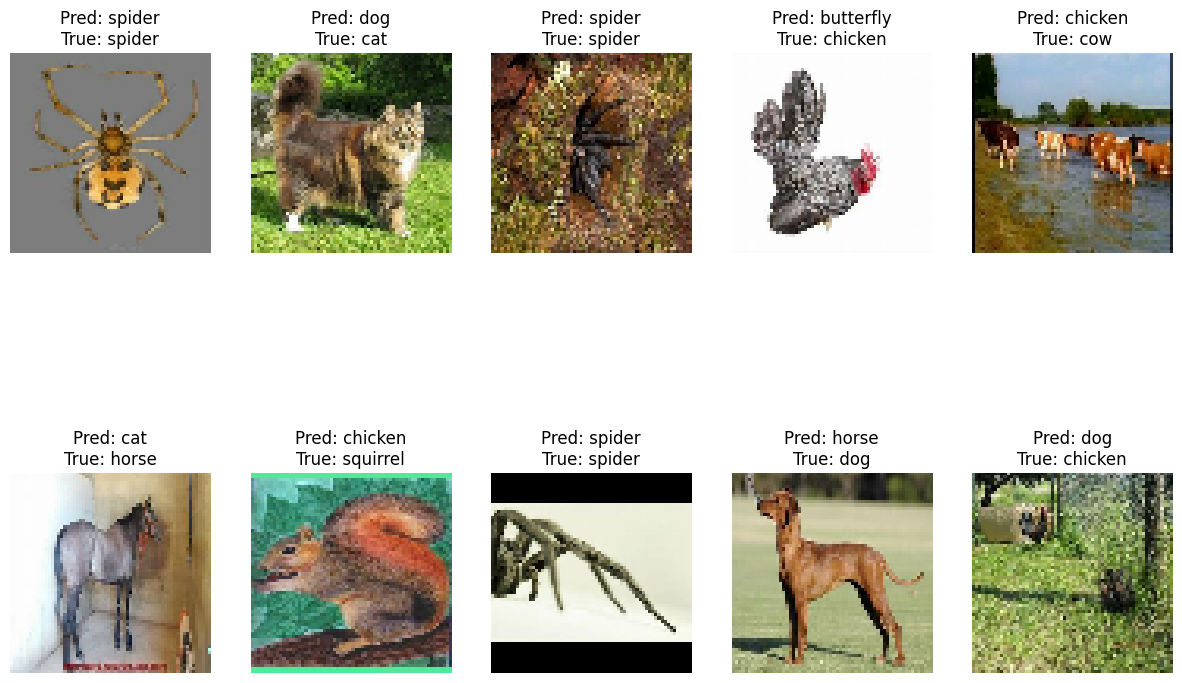

In [10]:
plt.figure(figsize=(15, 10)) 
for i in range(10):         
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(f"Pred: {classes[predicted_labels[i]]}\nTrue: {classes[labels.numpy()[i]]}")
    plt.axis("off")
plt.show()